<a href="https://colab.research.google.com/github/LIMJIALIH/UMHackathon-2025/blob/main/CryptoQuant_%2B_Yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy sklearn hmmlearn matplotlib yfinance
!apt-get install -y build-essential
!pip install cython
!pip install hmmlearn
!pip install cybotrade>=1.5.0
!pip install cybotrade-datasource

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [ ]:
# !pip install pandas numpy sklearn hmmlearn matplotlib yfinance
!apt-get install -y build-essential
!pip install cython
!pip install hmmlearn
# !pip install cybotrade>=1.5.0

import yfinance as yf
from datetime import date, timedelta, datetime
from IPython.display import display
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from hmmlearn import hmm
import matplotlib.pyplot as plt
import http.client
import json
import os
import pandas as pd
import asyncio
import cybotrade_datasource
from datetime import datetime, timezone


API_KEY = "YOUR_API_KEY"


data = await cybotrade_datasource.query_paginated(
    api_key=API_KEY,
    topic='cryptoquant|btc/inter-entity-flows/miner-to-miner?from_miner=f2pool&to_miner=all_miner&window=day',
    start_time=datetime(year=2020, month=4, day=12, tzinfo=timezone.utc),
    end_time=datetime(year=2025, month=4, day=13, tzinfo=timezone.utc)
)
df = pd.DataFrame(data)
print(df)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
         start_time        date  flow_mean  flow_total transactions_count_flow
0     1586649600000  2020-04-12   1.439685    8.638111                       6
1     1586736000000  2020-04-13   0.752173   10.530419                      14
2     1586822400000  2020-04-14   0.866490    8.664902                      10
3     1586908800000  2020-04-15   1.939228   19.392277                      10
4     1586995200000  2020-04-16   1.709978   17.099781                      10
...             ...         ...        ...         ...                     ...
1821  1743984000000  2025-04-07   0.056453    5.984009                     106
1822  1744070400000  2025-04-08   0.003034    0.394390                     130
1823  1744156800000  2025-04-09   0.010253    1.004815             

In [ ]:
df.head()

,start_time,date,flow_mean,flow_total,transactions_count_flow
0,1586649600000,2020-04-12,1.439685,8.638111,6
1,1586736000000,2020-04-13,0.752173,10.530419,14
2,1586822400000,2020-04-14,0.866490,8.664902,10
3,1586908800000,2020-04-15,1.939228,19.392277,10
4,1586995200000,2020-04-16,1.709978,17.099781,10


In [ ]:
df.tail()

,start_time,date,flow_mean,flow_total,transactions_count_flow
1821,1743984000000,2025-04-07,0.056453,5.984009,106
1822,1744070400000,2025-04-08,0.003034,0.394390,130
1823,1744156800000,2025-04-09,0.010253,1.004815,98
1824,1744243200000,2025-04-10,0.015895,1.780290,112
1825,1744329600000,2025-04-11,0.004131,0.884128,214


In [ ]:
df = df.drop(columns=['start_time']) # Changed 'column' to 'columns'

In [ ]:
import yfinance as yf

# Bitcoin ticker
ticker = "BTC-USD"

# Download last 30 days of daily data
data2 = yf.download(ticker, period="5Y", interval="1d")

# Save to CSV
data2.to_csv("bitcoin_last_5_years.csv")

from google.colab import files
files.download("bitcoin_last_5_years.csv")

[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

file_path_5_years = '/content/drive/MyDrive/Colab Notebooks/bitcoin_last_5_years.csv'  # Corrected file path

df2 = pd.read_csv(file_path_5_years)

# Remove first and last rows
df2 = df2.iloc[1:-1]

# Rename the 'Price' column to 'Date'
df2 = df2.rename(columns={'Price': 'Date'}) # Assuming 'Date' is your target column

df2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,Open,Close,High,Low,Volume
1,12/4/2020,6858.067871,6971.091797,7119.947266,6811.078125,3.575957e+10
2,13/4/2020,6965.616699,6845.037598,6965.616699,6668.259766,3.861931e+10
3,14/4/2020,6843.281738,6842.427734,6958.557129,6793.821289,3.411043e+10
4,15/4/2020,6845.561523,6642.109863,6928.664551,6633.402832,3.228831e+10
5,16/4/2020,6640.454102,7116.804199,7134.450684,6555.504395,4.678324e+10
...,...,...,...,...,...,...
1820,5/4/2025,83844.703130,83504.796880,84207.015630,82377.734380,1.438080e+10
1821,6/4/2025,83504.507810,78214.484380,83704.718750,77097.742190,3.629485e+10
1822,7/4/2025,78221.335940,79235.335940,81119.062500,74436.679690,9.126242e+10
1823,8/4/2025,79218.476560,76271.953130,80823.890630,76198.023440,4.831459e+10


for df, change the transactions_count_flow from object to int64, then change df2 Open, Close, High, Low and Volume, from object to int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     1826 non-null   object 
 1   flow_mean                1826 non-null   float64
 2   flow_total               1826 non-null   float64
 3   transactions_count_flow  1826 non-null   object 
dtypes: float64(2), object(2)
memory usage: 57.2+ KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 1 to 1824
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1824 non-null   object 
 1   Open    1824 non-null   float64
 2   Close   1824 non-null   float64
 3   High    1824 non-null   float64
 4   Low     1824 non-null   float64
 5   Volume  1824 non-null   float64
dtypes: float64(5), object(1)
memory usage: 85.6+ KB


Now I wanna combine the df and df2, ignore the Date Column from df2, then I wanna integrate them into one.

In [ ]:
# Assuming df and df2 are already loaded and preprocessed as discussed earlier

# Drop the 'Date' column from df2
df2 = df2.drop(columns=['Date'])

# Merge df and df2 based on their index
merged_df = pd.merge(df, df2, left_index=True, right_index=True)

# Display the merged DataFrame
print(merged_df)

            date  flow_mean  flow_total transactions_count_flow          Open  \
1     2020-04-13   0.752173   10.530419                      14   6858.067871   
2     2020-04-14   0.866490    8.664902                      10   6965.616699   
3     2020-04-15   1.939228   19.392277                      10   6843.281738   
4     2020-04-16   1.709978   17.099781                      10   6845.561523   
5     2020-04-17   1.058400    5.291998                       5   6640.454102   
...          ...        ...         ...                     ...           ...   
1820  2025-04-06   0.007837    0.603472                      77  83844.703130   
1821  2025-04-07   0.056453    5.984009                     106  83504.507810   
1822  2025-04-08   0.003034    0.394390                     130  78221.335940   
1823  2025-04-09   0.010253    1.004815                      98  79218.476560   
1824  2025-04-10   0.015895    1.780290                     112  76273.562500   

             Close         

In [ ]:
df = merged_df

In [ ]:
df

,date,flow_mean,flow_total,transactions_count_flow,Open,Close,High,Low,Volume
1,2020-04-13,0.752173,10.530419,14,6858.067871,6971.091797,7119.947266,6811.078125,3.575957e+10
2,2020-04-14,0.866490,8.664902,10,6965.616699,6845.037598,6965.616699,6668.259766,3.861931e+10
3,2020-04-15,1.939228,19.392277,10,6843.281738,6842.427734,6958.557129,6793.821289,3.411043e+10
4,2020-04-16,1.709978,17.099781,10,6845.561523,6642.109863,6928.664551,6633.402832,3.228831e+10
5,2020-04-17,1.058400,5.291998,5,6640.454102,7116.804199,7134.450684,6555.504395,4.678324e+10
...,...,...,...,...,...,...,...,...,...
1820,2025-04-06,0.007837,0.603472,77,83844.703130,83504.796880,84207.015630,82377.734380,1.438080e+10
1821,2025-04-07,0.056453,5.984009,106,83504.507810,78214.484380,83704.718750,77097.742190,3.629485e+10
1822,2025-04-08,0.003034,0.394390,130,78221.335940,79235.335940,81119.062500,74436.679690,9.126242e+10
1823,2025-04-09,0.010253,1.004815,98,79218.476560,76271.953130,80823.890630,76198.023440,4.831459e+10


In [ ]:
# Convert 'transactions_count_flow' to int64
df['transactions_count_flow'] = df['transactions_count_flow'].astype('int64')

# Verify the data type change
print(df['transactions_count_flow'].dtype)

int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1824 entries, 1 to 1824
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     1824 non-null   object 
 1   flow_mean                1824 non-null   float64
 2   flow_total               1824 non-null   float64
 3   transactions_count_flow  1824 non-null   int64  
 4   Open                     1824 non-null   float64
 5   Close                    1824 non-null   float64
 6   High                     1824 non-null   float64
 7   Low                      1824 non-null   float64
 8   Volume                   1824 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 207.0+ KB


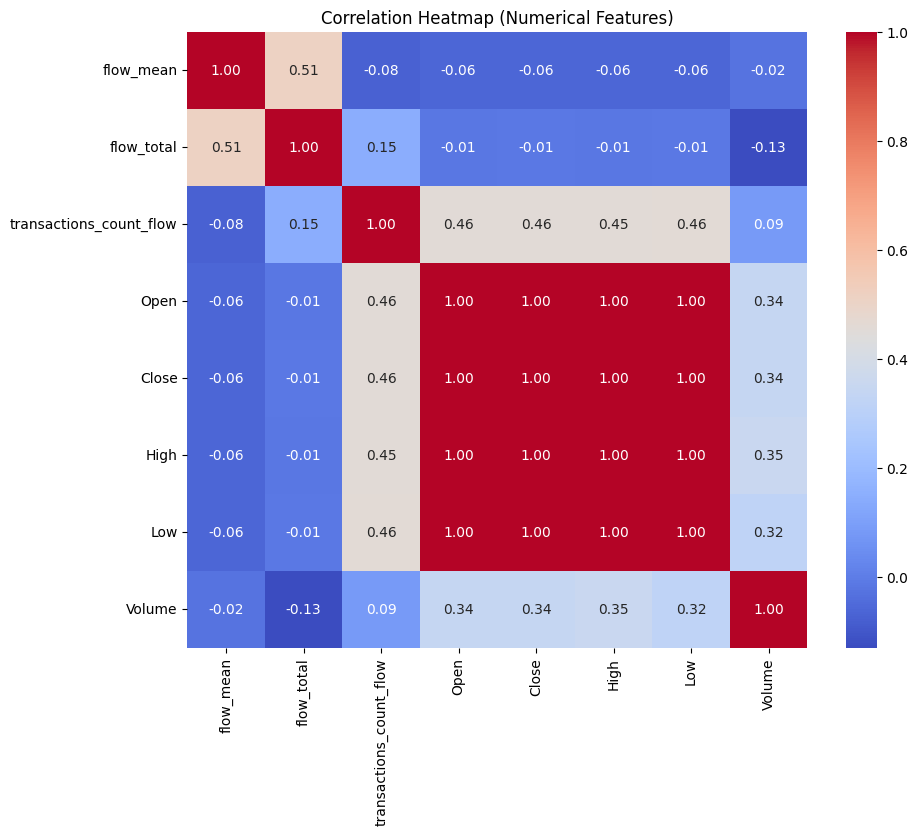

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features
numerical_features = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numerical_features.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

In [ ]:
import numpy as np

# Assuming 'df' is your DataFrame with 'Open' and 'Close' columns
df['trend'] = np.where(df['Close'] > df['Open'], 'bullish',
                       np.where(df['Close'] < df['Open'], 'bearish', 'neutral'))

# Print the updated DataFrame
print(df[['Open', 'Close', 'trend']])

              Open         Close    trend
1      6858.067871   6971.091797  bullish
2      6965.616699   6845.037598  bearish
3      6843.281738   6842.427734  bearish
4      6845.561523   6642.109863  bearish
5      6640.454102   7116.804199  bullish
...            ...           ...      ...
1820  83844.703130  83504.796880  bearish
1821  83504.507810  78214.484380  bearish
1822  78221.335940  79235.335940  bullish
1823  79218.476560  76271.953130  bearish
1824  76273.562500  82573.953130  bullish

[1824 rows x 3 columns]


In [ ]:
trend_counts = df['trend'].value_counts()
print(trend_counts)

trend
bullish    935
bearish    889
Name: count, dtype: int64


Average Volume for Bullish Trends: 33392439660.255615
Average Volume for Bearish Trends: 33823254649.524185


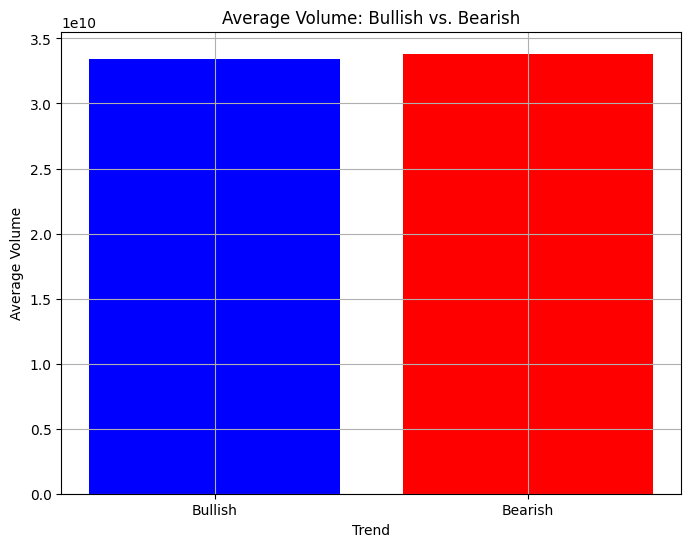

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter data for bullish and bearish trends
bullish_df = df[df['trend'] == 'bullish']
bearish_df = df[df['trend'] == 'bearish']

# Calculate average volumes
average_bullish_volume = bullish_df['Volume'].mean()
average_bearish_volume = bearish_df['Volume'].mean()

# Print the results
print(f"Average Volume for Bullish Trends: {average_bullish_volume}")
print(f"Average Volume for Bearish Trends: {average_bearish_volume}")

# Create data for the histogram
data = [average_bullish_volume, average_bearish_volume]
labels = ['Bullish', 'Bearish']

# Create the histogram
plt.figure(figsize=(8, 6))
plt.bar(labels, data, color=['blue', 'red'])
plt.title('Average Volume: Bullish vs. Bearish')
plt.xlabel('Trend')
plt.ylabel('Average Volume')
plt.grid(True)
plt.show()

Average flow_mean for Bullish Trends: 1.1910609487593582
Average flow_mean for Bearish Trends: 0.9413204705286841


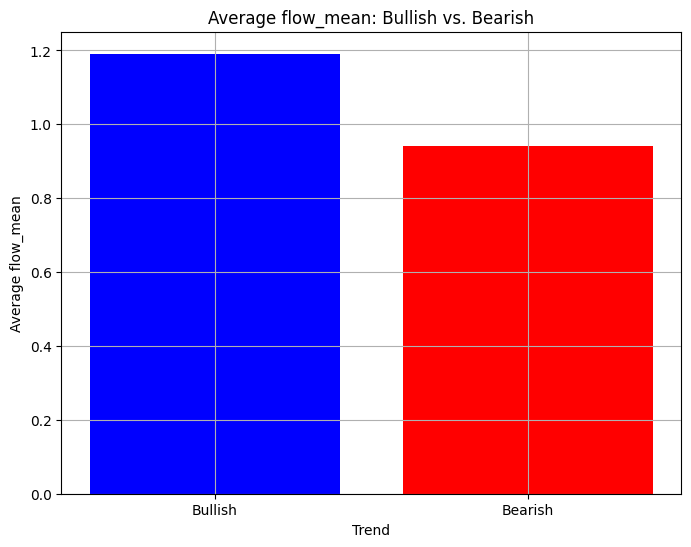

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter data for bullish and bearish trends
bullish_df = df[df['trend'] == 'bullish']
bearish_df = df[df['trend'] == 'bearish']

# Calculate average flow_mean
average_bullish_flow_mean = bullish_df['flow_mean'].mean()
average_bearish_flow_mean = bearish_df['flow_mean'].mean()

# Print the results
print(f"Average flow_mean for Bullish Trends: {average_bullish_flow_mean}")
print(f"Average flow_mean for Bearish Trends: {average_bearish_flow_mean}")

# Create data for the histogram
data = [average_bullish_flow_mean, average_bearish_flow_mean]
labels = ['Bullish', 'Bearish']

# Create the histogram
plt.figure(figsize=(8, 6))
plt.bar(labels, data, color=['blue', 'red'])
plt.title('Average flow_mean: Bullish vs. Bearish')
plt.xlabel('Trend')
plt.ylabel('Average flow_mean')
plt.grid(True)
plt.show()

Average transactions_count_flow for Bullish Trends: 129.73689839572194
Average transactions_count_flow for Bearish Trends: 133.96850393700788


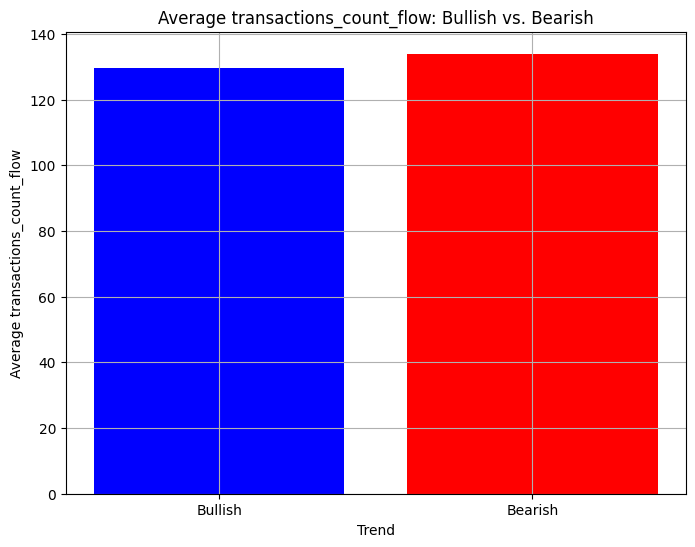

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter data for bullish and bearish trends
bullish_df = df[df['trend'] == 'bullish']
bearish_df = df[df['trend'] == 'bearish']

# Calculate average transactions_count_flow
average_bullish_transactions_count_flow = bullish_df['transactions_count_flow'].mean()
average_bearish_transactions_count_flow = bearish_df['transactions_count_flow'].mean()

# Print the results
print(f"Average transactions_count_flow for Bullish Trends: {average_bullish_transactions_count_flow}")
print(f"Average transactions_count_flow for Bearish Trends: {average_bearish_transactions_count_flow}")

# Create data for the histogram
data = [average_bullish_transactions_count_flow, average_bearish_transactions_count_flow]
labels = ['Bullish', 'Bearish']

# Create the histogram
plt.figure(figsize=(8, 6))
plt.bar(labels, data, color=['blue', 'red'])
plt.title('Average transactions_count_flow: Bullish vs. Bearish')
plt.xlabel('Trend')
plt.ylabel('Average transactions_count_flow')
plt.grid(True)
plt.show()

Average flow_total for Bullish Trends: 39.62410026561498
Average flow_total for Bearish Trends: 32.75230956807649


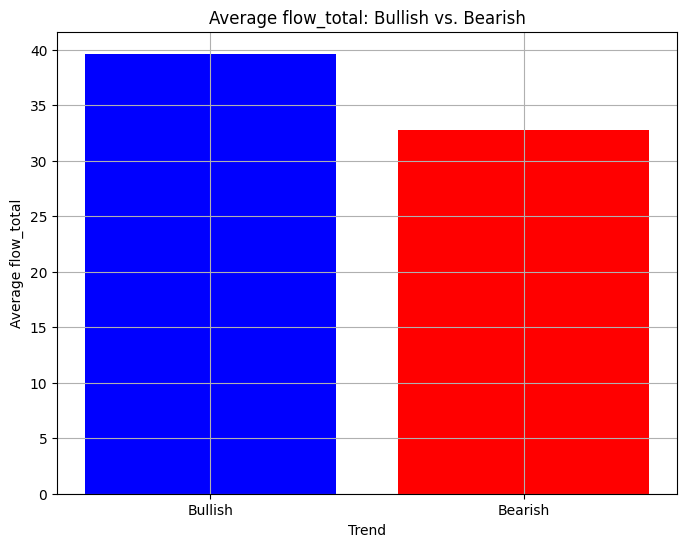

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter data for bullish and bearish trends
bullish_df = df[df['trend'] == 'bullish']
bearish_df = df[df['trend'] == 'bearish']

# Calculate average flow_total
average_bullish_flow_total = bullish_df['flow_total'].mean()
average_bearish_flow_total = bearish_df['flow_total'].mean()

# Print the results
print(f"Average flow_total for Bullish Trends: {average_bullish_flow_total}")
print(f"Average flow_total for Bearish Trends: {average_bearish_flow_total}")

# Create data for the histogram
data = [average_bullish_flow_total, average_bearish_flow_total]
labels = ['Bullish', 'Bearish']

# Create the histogram
plt.figure(figsize=(8, 6))
plt.bar(labels, data, color=['blue', 'red'])
plt.title('Average flow_total: Bullish vs. Bearish')
plt.xlabel('Trend')
plt.ylabel('Average flow_total')
plt.grid(True)
plt.show()

###Realising how the bearlish and bullish doesnt really affect the flow_total, transactions_count_flow, flow_mean and the volume, since both values comparing are similar


In [ ]:
df.groupby('trend')[['Volume', 'flow_mean', 'flow_total']].mean()

,Volume,flow_mean,flow_total
trend,,,
bearish,3.382325e+10,0.941320,32.75231
bullish,3.339244e+10,1.191061,39.62410


1. Daily Price Metrics and Return Behavior


These are to analyze return trends, volatility, and daily strength.

In [ ]:
df['daily_return'] = df['Close'].pct_change()
df['price_diff'] = df['Close'] - df['Open']
df['daily_range'] = df['High'] - df['Low']
df['range_pct'] = df['daily_range'] / df['Open']


Text(0.5, 1.0, 'Daily Return Distribution')

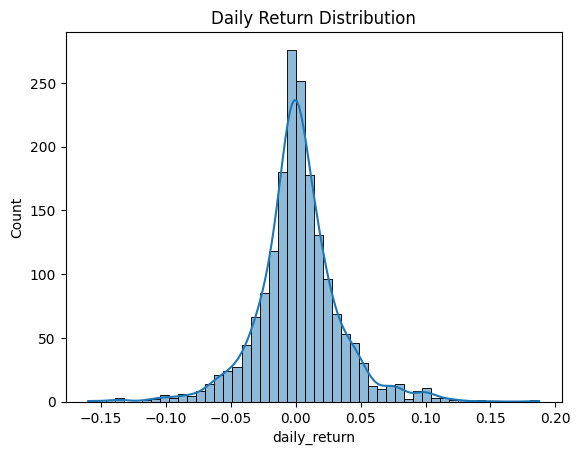

In [ ]:
sns.histplot(df['daily_return'], bins=50, kde=True)
plt.title("Daily Return Distribution")

In [ ]:
#2. Volatility Analysis

#To see if volatility spikes predict price movement or coincide with miner activity.

df['rolling_volatility'] = df['daily_return'].rolling(14).std()


<Axes: xlabel='flow_total', ylabel='daily_return'>

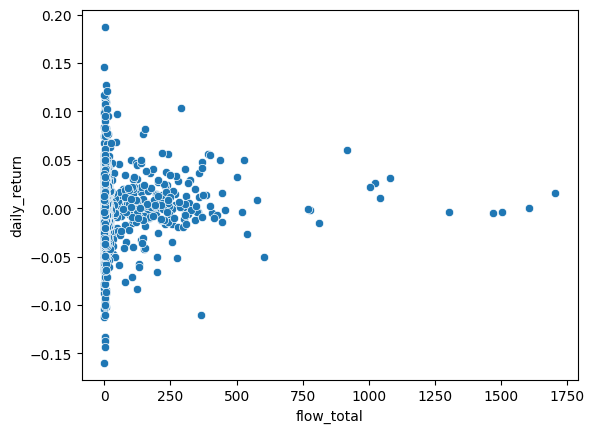

In [ ]:
#3. Flow Analysis vs Price

sns.scatterplot(data=df, x='flow_total', y='daily_return')

In [ ]:
#Group by quantiles of flow:

#To test the hypothesis that increased miner flow = bearish signal.

df['flow_q'] = pd.qcut(df['flow_total'], 4)
df.groupby('flow_q')['daily_return'].mean()

<ipython-input-156-218032771f0c>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('flow_q')['daily_return'].mean()


,daily_return
flow_q,
"(0.25, 1.375]",-0.001952
"(1.375, 3.595]",0.001891
"(3.595, 7.755]",0.005133
"(7.755, 1704.317]",0.002371


<Axes: >

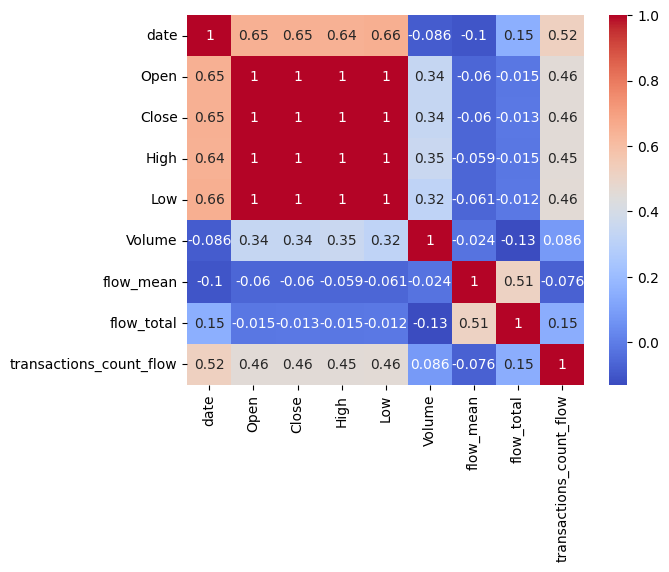

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'date' is the name of your date column
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' to datetime objects

# Extract numerical features for scaling, including date as numeric
numerical_features = ['date', 'Open', 'Close', 'High', 'Low', 'Volume',
                      'flow_mean', 'flow_total', 'transactions_count_flow']
#You can add or remove from this list to fit your specific needs

# Create a copy for scaling
df_scaled = df[numerical_features].copy()

# Convert date to numerical representation (e.g., Unix timestamp)
df_scaled['date'] = df_scaled['date'].astype('int64') // 10**9  # Convert to Unix timestamp

# Apply StandardScaler
scaler = StandardScaler()
df_scaled[numerical_features] = scaler.fit_transform(df_scaled[numerical_features])

# Now you can use df_scaled for correlation analysis
import seaborn as sns
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='date'>

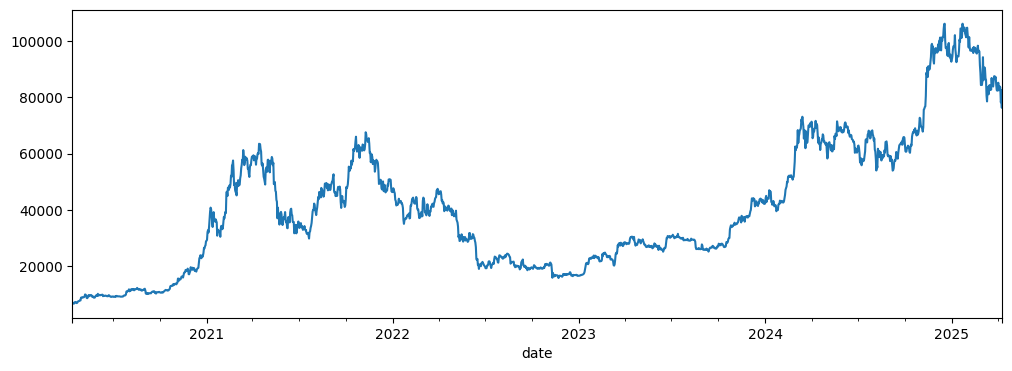

In [ ]:
#Plot over time

df.set_index('date')['Close'].plot(figsize=(12, 4))

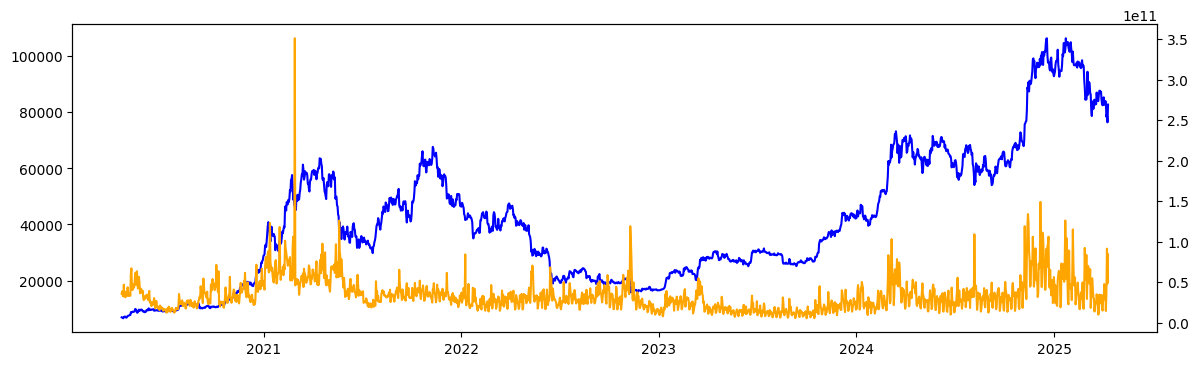

In [ ]:
#Or overlay volume and price:
fig, ax1 = plt.subplots(figsize=(14, 4))
ax2 = ax1.twinx()
ax1.plot(df['date'], df['Close'], color='blue')
ax2.plot(df['date'], df['Volume'], color='orange')

In [ ]:
# SMA & EMA (Trend Indicators)

df['SMA20'] = df['Close'].rolling(window=20).mean()
df['SMA50'] = df['Close'].rolling(window=50).mean()

df['EMA20'] = df['Close'].ewm(span=20, adjust=False).mean()
df['EMA50'] = df['Close'].ewm(span=50, adjust=False).mean()


In [ ]:
#MACD (Momentum Indicator)

ema12 = df['Close'].ewm(span=12, adjust=False).mean()
ema26 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = ema12 - ema26
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()


In [ ]:
#Trading Signals + Position

df['Signal'] = 0
df.loc[df['MACD'] > df['Signal_Line'], 'Signal'] = 1  # Buy
df.loc[df['MACD'] < df['Signal_Line'], 'Signal'] = -1  # Sell

df['Position'] = df['Signal'].shift(1).fillna(0)


In [ ]:
#Calculate PnL (Profit and Loss)

df['daily_return'] = df['Close'].pct_change()
df['strategy_return'] = df['Position'] * df['daily_return']
df['cumulative_strategy'] = (1 + df['strategy_return']).cumprod()
df['cumulative_benchmark'] = (1 + df['daily_return']).cumprod()

In [ ]:
#You can also add fees:

fee = 0.001  # 0.1% per trade
df['fee'] = df['Signal'].diff().abs() * fee
df['strategy_return_net'] = df['strategy_return'] - df['fee']

In [ ]:
#Regime Detection (Optional)

df['regime'] = np.where(df['SMA20'] > df['SMA50'], 'bullish', 'bearish')

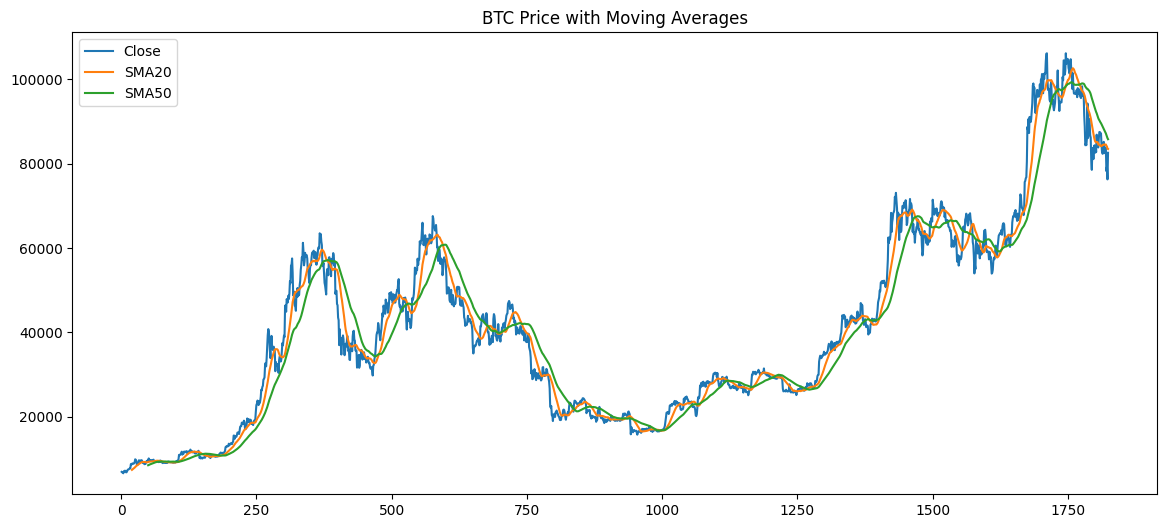

In [ ]:
#Visualization Ideas

plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close')
plt.plot(df['SMA20'], label='SMA20')
plt.plot(df['SMA50'], label='SMA50')
plt.title('BTC Price with Moving Averages')
plt.legend()
plt.show()


Text(0.5, 1.0, 'MACD Indicator')

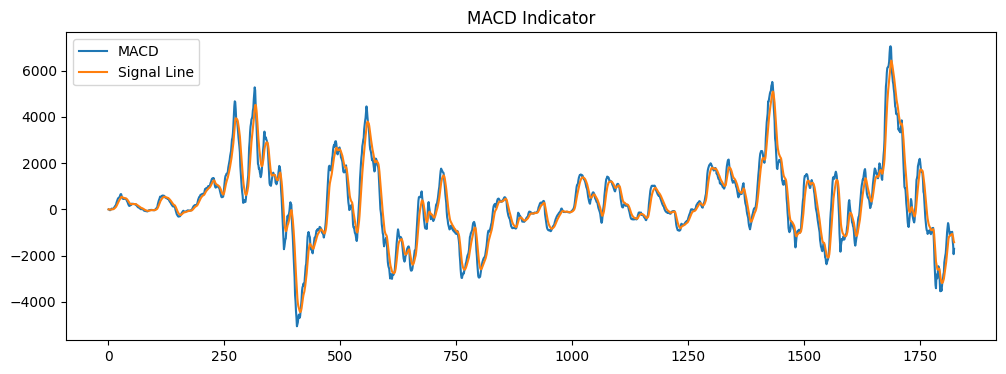

In [ ]:
#And plot MACD:

plt.figure(figsize=(12, 4))
plt.plot(df['MACD'], label='MACD')
plt.plot(df['Signal_Line'], label='Signal Line')
plt.legend()
plt.title('MACD Indicator')


In [ ]:
#Step 1: Feature Engineering for HMM Input

!pip install hmmlearn

import numpy as np
import pandas as pd

# Calculate log returns
df['log_return'] = np.log(df['Close'] / df['Close'].shift(1))

# Optional: Rolling volatility (standard deviation)
df['volatility'] = df['log_return'].rolling(window=5).std()

# Drop NaNs
df_hmm = df[['log_return', 'volatility']].dropna()


In [ ]:
#Step 2: Train Hidden Markov Model

from hmmlearn.hmm import GaussianHMM

# Set number of regimes (2=bullish/bearish, 3=add volatile)
n_states = 3

model = GaussianHMM(n_components=n_states, covariance_type='full', n_iter=1000, random_state=42)
model.fit(df_hmm)

# Predict hidden states (regimes)
hidden_states = model.predict(df_hmm)

# Add to original dataframe
df.loc[df_hmm.index, 'regime'] = hidden_states


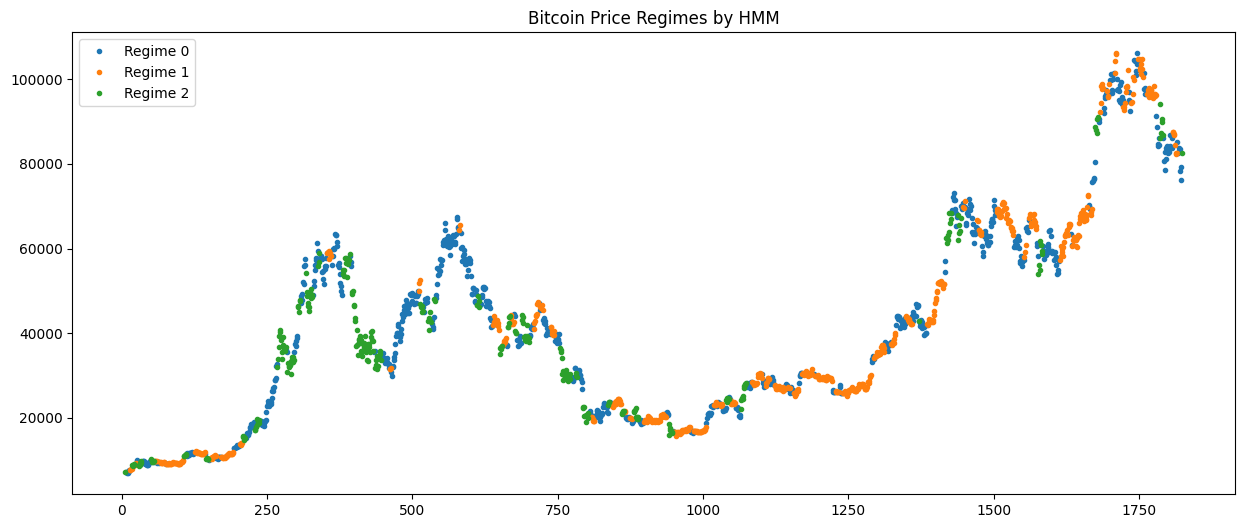

In [ ]:
#Step 3: Visualize Regime

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
for i in range(n_states):
    state = df[df['regime'] == i]
    plt.plot(state.index, state['Close'], '.', label=f'Regime {i}')
plt.legend()
plt.title('Bitcoin Price Regimes by HMM')
plt.show()


In [ ]:
#Label the Regimes (Bullish/Bearish/Volatile)

# Example: assume Regime 0 = Bearish, 1 = Bullish, 2 = Volatile
regime_map = {0: 'bearish', 1: 'bullish', 2: 'volatile'}
df['regime_label'] = df['regime'].map(regime_map)


In [ ]:
#Use Regime in Strategy

# Only take long trades during 'bullish' regime
df['filtered_signal'] = np.where((df['Signal'] == 1) & (df['regime_label'] == 'bullish'), 1, 0)


OBV (On-Balance Volume)
OBV is a cumulative indicator that relates volume flow to price change — helpful to detect volume-backed moves.

OBV Formula:
If Close_t > Close_{t-1} → OBV += Volume

If Close_t < Close_{t-1} → OBV -= Volume

Else → OBV unchanged

In [ ]:
# Initialize OBV column
df['OBV'] = 0
df = df.reset_index(drop=True)  # Reset the index to start from 0
# Iterate to compute OBV
for i in range(1, len(df)):
    if df.loc[i, 'Close'] > df.loc[i-1, 'Close']:
        df.loc[i, 'OBV'] = df.loc[i-1, 'OBV'] + df.loc[i, 'Volume']
    elif df.loc[i, 'Close'] < df.loc[i-1, 'Close']:
        df.loc[i, 'OBV'] = df.loc[i-1, 'OBV'] - df.loc[i, 'Volume']
    else:
        df.loc[i, 'OBV'] = df.loc[i-1, 'OBV']

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 0 to 1823
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     1824 non-null   datetime64[ns]
 1   flow_mean                1824 non-null   float64       
 2   flow_total               1824 non-null   float64       
 3   transactions_count_flow  1824 non-null   int64         
 4   Open                     1824 non-null   float64       
 5   Close                    1824 non-null   float64       
 6   High                     1824 non-null   float64       
 7   Low                      1824 non-null   float64       
 8   Volume                   1824 non-null   float64       
 9   trend                    1824 non-null   object        
 10  daily_return             1823 non-null   float64       
 11  price_diff               1824 non-null   float64       
 12  daily_range              1824 non-

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Calculate percentage of missing data
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage)


date                        0
flow_mean                   0
flow_total                  0
transactions_count_flow     0
Open                        0
Close                       0
High                        0
Low                         0
Volume                      0
trend                       0
daily_return                1
price_diff                  0
daily_range                 0
range_pct                   0
rolling_volatility         14
flow_q                      0
SMA20                      19
SMA50                      49
EMA20                       0
EMA50                       0
MACD                        0
Signal_Line                 0
Signal                      0
Position                    0
strategy_return             1
cumulative_strategy         1
cumulative_benchmark        1
fee                         1
strategy_return_net         1
regime                      0
log_return                  1
volatility                  5
regime_label                5
filtered_s

In [ ]:
# Impute with mean
df['daily_return'].fillna(df['daily_return'].mean(), inplace=True)

# Impute with rolling average for time-series features
df['SMA20'].fillna(df['SMA20'].rolling(window=5, min_periods=1).mean(), inplace=True)
df['SMA50'].fillna(df['SMA50'].rolling(window=5, min_periods=1).mean(), inplace=True)


<ipython-input-176-88b3b4821c9a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['daily_return'].fillna(df['daily_return'].mean(), inplace=True)
<ipython-input-176-88b3b4821c9a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [ ]:
# Forward-fill missing values
df['rolling_volatility'].fillna(method='ffill', inplace=True)

# Backward-fill missing values
df['strategy_return'].fillna(method='bfill', inplace=True)


<ipython-input-177-0c586710e386>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rolling_volatility'].fillna(method='ffill', inplace=True)
<ipython-input-177-0c586710e386>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['rolling_volatility'].fillna(method='ffill', inplace=True)
<ipython-input-177-0c586710e386>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inpla

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 0 to 1823
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     1824 non-null   datetime64[ns]
 1   flow_mean                1824 non-null   float64       
 2   flow_total               1824 non-null   float64       
 3   transactions_count_flow  1824 non-null   int64         
 4   Open                     1824 non-null   float64       
 5   Close                    1824 non-null   float64       
 6   High                     1824 non-null   float64       
 7   Low                      1824 non-null   float64       
 8   Volume                   1824 non-null   float64       
 9   trend                    1824 non-null   object        
 10  daily_return             1824 non-null   float64       
 11  price_diff               1824 non-null   float64       
 12  daily_range              1824 non-

In [ ]:
# Fill missing categorical values with mode
df['regime_label'].fillna(df['regime_label'].mode()[0], inplace=True)


<ipython-input-179-d344d2e4ab10>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['regime_label'].fillna(df['regime_label'].mode()[0], inplace=True)


In [ ]:
# Forward-fill missing categorical values
df['regime_label'].fillna(method='ffill', inplace=True)


<ipython-input-180-e527e72463a4>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['regime_label'].fillna(method='ffill', inplace=True)


In [ ]:
df.tail()

,date,flow_mean,flow_total,transactions_count_flow,Open,Close,High,Low,Volume,trend,...,cumulative_strategy,cumulative_benchmark,fee,strategy_return_net,regime,log_return,volatility,regime_label,filtered_signal,OBV
1819,2025-04-06,0.007837,0.603472,77,83844.70313,83504.79688,84207.01563,82377.73438,1.438080e+10,bearish,...,1.470792,11.978726,0.000,-0.004043,0,-0.004052,0.023052,bearish,0,1282052369588
1820,2025-04-07,0.056453,5.984009,106,83504.50781,78214.48438,83704.71875,77097.74219,3.629485e+10,bearish,...,1.377612,11.219833,0.002,-0.065353,0,-0.065449,0.031654,bearish,0,1245757515852
1821,2025-04-08,0.003034,0.394390,130,78221.33594,79235.33594,81119.06250,74436.67969,9.126242e+10,bullish,...,1.359632,11.366273,0.000,-0.013052,0,0.012968,0.032708,bearish,0,1337019940839
1822,2025-04-09,0.010253,1.004815,98,79218.47656,76271.95313,80823.89063,76198.02344,4.831459e+10,bearish,...,1.410482,10.941178,0.000,0.037400,0,-0.038117,0.033647,bearish,0,1288705350090
1823,2025-04-10,0.015895,1.780290,112,76273.56250,82573.95313,83541.00000,74589.67188,8.421363e+10,bullish,...,1.293940,11.845197,0.000,-0.082625,2,0.079389,0.055175,volatile,0,1372918977128


In [ ]:
nan_rows = df[df['cumulative_strategy'].isnull()]

# Print the NaN rows
print(nan_rows)

        date  flow_mean  flow_total  transactions_count_flow         Open  \
0 2020-04-13   0.752173   10.530419                       14  6858.067871   

         Close         High          Low        Volume    trend  ...  \
0  6971.091797  7119.947266  6811.078125  3.575957e+10  bullish  ...   

   cumulative_strategy  cumulative_benchmark  fee  strategy_return_net  \
0                  NaN                   NaN  NaN                  NaN   

    regime log_return  volatility  regime_label  filtered_signal  OBV  
0  bearish        NaN         NaN       bearish                0    0  

[1 rows x 35 columns]


In [ ]:
#To address all the NaN values:

# ... (your code for fetching, merging, and feature engineering) ...

# 1. Calculate daily_return and handle initial NaN
df['daily_return'] = df['Close'].pct_change()
df['daily_return'].fillna(0, inplace=True)  # Fill initial NaN with 0 (or a suitable value)

# 2. Calculate log_return and handle initial NaN
df['log_return'] = np.log(df['Close'] / df['Close'].shift(1))
df['log_return'].fillna(0, inplace=True)  # Fill initial NaN with 0 (or a suitable value)

# 3. Calculate volatility and handle initial NaN
df['volatility'] = df['log_return'].rolling(window=7).std()
df['volatility'].fillna(method='bfill', inplace=True)  # Backfill initial NaN

# 4. Calculate SMA20 and SMA50 and handle initial NaN
df['SMA20'] = df['Close'].rolling(window=20).mean()
df['SMA50'] = df['Close'].rolling(window=50).mean()
df['SMA20'].fillna(method='bfill', inplace=True)  # Backfill initial NaN
df['SMA50'].fillna(method='bfill', inplace=True)  # Backfill initial NaN

# 5. Calculate Signal, Position, and fee
df['Signal'] = 0
df.loc[df['MACD'] > df['Signal_Line'], 'Signal'] = 1  # Buy
df.loc[df['MACD'] < df['Signal_Line'], 'Signal'] = -1  # Sell

df['Position'] = df['Signal'].shift(1).fillna(0)

fee = 0.001  # 0.1% per trade
df['fee'] = df['Signal'].diff().abs() * fee
df['fee'].fillna(0, inplace=True)  # Fill potential NaN with 0

# 6. Calculate strategy_return_net and cumulative_strategy, cumulative_benchmark
df['strategy_return'] = df['Position'] * df['daily_return']
df['strategy_return_net'] = df['strategy_return'] - df['fee']
df['cumulative_strategy'] = (1 + df['strategy_return_net']).cumprod()
df['cumulative_benchmark'] = (1 + df['daily_return']).cumprod()

df['rolling_volatility'] = df['daily_return'].rolling(window=14).std()  # Or your desired window
df['rolling_volatility'].fillna(method='bfill', inplace=True)  # Backfill initial NaN



<ipython-input-183-c5bf9dad24b2>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['daily_return'].fillna(0, inplace=True)  # Fill initial NaN with 0 (or a suitable value)
<ipython-input-183-c5bf9dad24b2>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [ ]:
df.head()

,date,flow_mean,flow_total,transactions_count_flow,Open,Close,High,Low,Volume,trend,...,cumulative_strategy,cumulative_benchmark,fee,strategy_return_net,regime,log_return,volatility,regime_label,filtered_signal,OBV
0,2020-04-13,0.752173,10.530419,14,6858.067871,6971.091797,7119.947266,6811.078125,3.575957e+10,bullish,...,1.000000,1.000000,0.000,0.000000,bearish,0.000000,0.032311,bearish,0,0
1,2020-04-14,0.866490,8.664902,10,6965.616699,6845.037598,6965.616699,6668.259766,3.861931e+10,bearish,...,0.999000,0.981918,0.001,-0.001000,bearish,-0.018248,0.032311,bearish,0,-38619308647
2,2020-04-15,1.939228,19.392277,10,6843.281738,6842.427734,6958.557129,6793.821289,3.411043e+10,bearish,...,0.999381,0.981543,0.000,0.000381,bearish,-0.000381,0.032311,bearish,0,-72729742699
3,2020-04-16,1.709978,17.099781,10,6845.561523,6642.109863,6928.664551,6633.402832,3.228831e+10,bearish,...,1.028639,0.952808,0.000,0.029276,bearish,-0.029713,0.032311,bearish,0,-105018053730
4,2020-04-17,1.058400,5.291998,5,6640.454102,7116.804199,7134.450684,6555.504395,4.678324e+10,bullish,...,0.955124,1.020902,0.000,-0.071467,bearish,0.069029,0.032311,bearish,0,-58234811353


In [ ]:
df.regime_label.unique()

array(['bearish', 'volatile', 'bullish'], dtype=object)

In [ ]:
df.drop(columns=['trend'], inplace=True)

In [ ]:
regime_mapping = {'bearish': 0, 'volatile': 1, 'bullish': 2}
df['regime_label'] = df['regime_label'].map(regime_mapping)

# Change data type to int64
df['regime_label'] = df['regime_label'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 0 to 1823
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     1824 non-null   datetime64[ns]
 1   flow_mean                1824 non-null   float64       
 2   flow_total               1824 non-null   float64       
 3   transactions_count_flow  1824 non-null   int64         
 4   Open                     1824 non-null   float64       
 5   Close                    1824 non-null   float64       
 6   High                     1824 non-null   float64       
 7   Low                      1824 non-null   float64       
 8   Volume                   1824 non-null   float64       
 9   daily_return             1824 non-null   float64       
 10  price_diff               1824 non-null   float64       
 11  daily_range              1824 non-null   float64       
 12  range_pct                1824 non-

In [ ]:
print(df['flow_q'])

0       (7.755, 1704.317]
1       (7.755, 1704.317]
2       (7.755, 1704.317]
3       (7.755, 1704.317]
4          (3.595, 7.755]
              ...        
1819        (0.25, 1.375]
1820       (3.595, 7.755]
1821        (0.25, 1.375]
1822        (0.25, 1.375]
1823       (1.375, 3.595]
Name: flow_q, Length: 1824, dtype: category
Categories (4, interval[float64, right]): [(0.25, 1.375] < (1.375, 3.595] < (3.595, 7.755] <
                                           (7.755, 1704.317]]


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'flow_q' column
df['flow_q_encoded'] = label_encoder.fit_transform(df['flow_q'])

In [ ]:
import pandas as pd

# Perform one-hot encoding
df = pd.get_dummies(df, columns=['flow_q'], prefix=['flow_q'])

In [ ]:
df.head()

,date,flow_mean,flow_total,transactions_count_flow,Open,Close,High,Low,Volume,daily_return,...,log_return,volatility,regime_label,filtered_signal,OBV,flow_q_encoded,"flow_q_(0.25, 1.375]","flow_q_(1.375, 3.595]","flow_q_(3.595, 7.755]","flow_q_(7.755, 1704.317]"
0,2020-04-13,0.752173,10.530419,14,6858.067871,6971.091797,7119.947266,6811.078125,3.575957e+10,0.000000,...,0.000000,0.032311,0,0,0,3,False,False,False,True
1,2020-04-14,0.866490,8.664902,10,6965.616699,6845.037598,6965.616699,6668.259766,3.861931e+10,-0.018082,...,-0.018248,0.032311,0,0,-38619308647,3,False,False,False,True
2,2020-04-15,1.939228,19.392277,10,6843.281738,6842.427734,6958.557129,6793.821289,3.411043e+10,-0.000381,...,-0.000381,0.032311,0,0,-72729742699,3,False,False,False,True
3,2020-04-16,1.709978,17.099781,10,6845.561523,6642.109863,6928.664551,6633.402832,3.228831e+10,-0.029276,...,-0.029713,0.032311,0,0,-105018053730,3,False,False,False,True
4,2020-04-17,1.058400,5.291998,5,6640.454102,7116.804199,7134.450684,6555.504395,4.678324e+10,0.071467,...,0.069029,0.032311,0,0,-58234811353,2,False,False,True,False


In [ ]:
# Convert boolean columns to integers
for column in df.select_dtypes(include=['bool']).columns:
    df[column] = df[column].astype(int)  # or df[column] = df[column].map(lambda x: 1 if x else 0)

In [ ]:
# Drop the 'regime' column
df = df.drop(columns=['regime'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 0 to 1823
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      1824 non-null   datetime64[ns]
 1   flow_mean                 1824 non-null   float64       
 2   flow_total                1824 non-null   float64       
 3   transactions_count_flow   1824 non-null   int64         
 4   Open                      1824 non-null   float64       
 5   Close                     1824 non-null   float64       
 6   High                      1824 non-null   float64       
 7   Low                       1824 non-null   float64       
 8   Volume                    1824 non-null   float64       
 9   daily_return              1824 non-null   float64       
 10  price_diff                1824 non-null   float64       
 11  daily_range               1824 non-null   float64       
 12  range_pct           

In [ ]:
df

,date,flow_mean,flow_total,transactions_count_flow,Open,Close,High,Low,Volume,daily_return,...,log_return,volatility,regime_label,filtered_signal,OBV,flow_q_encoded,"flow_q_(0.25, 1.375]","flow_q_(1.375, 3.595]","flow_q_(3.595, 7.755]","flow_q_(7.755, 1704.317]"
0,2020-04-13,0.752173,10.530419,14,6858.067871,6971.091797,7119.947266,6811.078125,3.575957e+10,0.000000,...,0.000000,0.032311,0,0,0,3,0,0,0,1
1,2020-04-14,0.866490,8.664902,10,6965.616699,6845.037598,6965.616699,6668.259766,3.861931e+10,-0.018082,...,-0.018248,0.032311,0,0,-38619308647,3,0,0,0,1
2,2020-04-15,1.939228,19.392277,10,6843.281738,6842.427734,6958.557129,6793.821289,3.411043e+10,-0.000381,...,-0.000381,0.032311,0,0,-72729742699,3,0,0,0,1
3,2020-04-16,1.709978,17.099781,10,6845.561523,6642.109863,6928.664551,6633.402832,3.228831e+10,-0.029276,...,-0.029713,0.032311,0,0,-105018053730,3,0,0,0,1
4,2020-04-17,1.058400,5.291998,5,6640.454102,7116.804199,7134.450684,6555.504395,4.678324e+10,0.071467,...,0.069029,0.032311,0,0,-58234811353,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,2025-04-06,0.007837,0.603472,77,83844.703130,83504.796880,84207.015630,82377.734380,1.438080e+10,-0.004043,...,-0.004052,0.018939,0,0,1282052369588,0,1,0,0,0
1820,2025-04-07,0.056453,5.984009,106,83504.507810,78214.484380,83704.718750,77097.742190,3.629485e+10,-0.063353,...,-0.065449,0.031796,0,0,1245757515852,2,0,0,1,0
1821,2025-04-08,0.003034,0.394390,130,78221.335940,79235.335940,81119.062500,74436.679690,9.126242e+10,0.013052,...,0.012968,0.032568,0,0,1337019940839,0,1,0,0,0
1822,2025-04-09,0.010253,1.004815,98,79218.476560,76271.953130,80823.890630,76198.023440,4.831459e+10,-0.037400,...,-0.038117,0.029836,0,0,1288705350090,0,1,0,0,0


Machine Learning

Steps for Year-Based Cross-Validation
Split the data into yearly folds:

Fold 1: 2020-2021

Fold 2: 2021-2022

Fold 3: 2022-2023

Fold 4: 2023-2024

Fold 5: 2024-2025

Perform cross-validation:

Phase 1: Train on Folds 1 to 4, test on Fold 5.

Phase 2: Train on Folds 1, 2, 3, and 5, test on Fold 4.

Phase 3: Train on Folds 1, 2, 4, and 5, test on Fold 3.

Phase 4: Train on Folds 2, 3, 4, and 5, test on Fold 1.

Phase 5: Train on Folds 1, 3, 4, and 5, test on Fold 2.

Evaluate each phase with R², RMSE, and MAE.

Plot actual vs predicted values for both training and testing data for each phase.

In [ ]:
df.to_csv('your_dataset.csv', index=False)

print("CSV file created successfully.")

CSV file created successfully.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Ensure 'date' is datetime
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Feature Engineering: Adding Lagged and Rolling Features
df['lag1_Close'] = df['Close'].shift(1)
df['lag2_Close'] = df['Close'].shift(2)
df['rolling_mean_7'] = df['Close'].rolling(window=7).mean()
df['rolling_std_7'] = df['Close'].rolling(window=7).std()

# Drop NaN rows caused by lagged and rolling features
df.dropna(inplace=True)

# Define Features and Target
rf_features = ['lag1_Close', 'lag2_Close', 'rolling_mean_7', 'rolling_std_7',
               'flow_mean', 'flow_total', 'transactions_count_flow', 'rolling_volatility',
               'SMA20', 'SMA50', 'EMA20', 'EMA50', 'MACD', 'Signal_Line', 'OBV']
target = 'Close'
X = df[rf_features]
y = df[target]


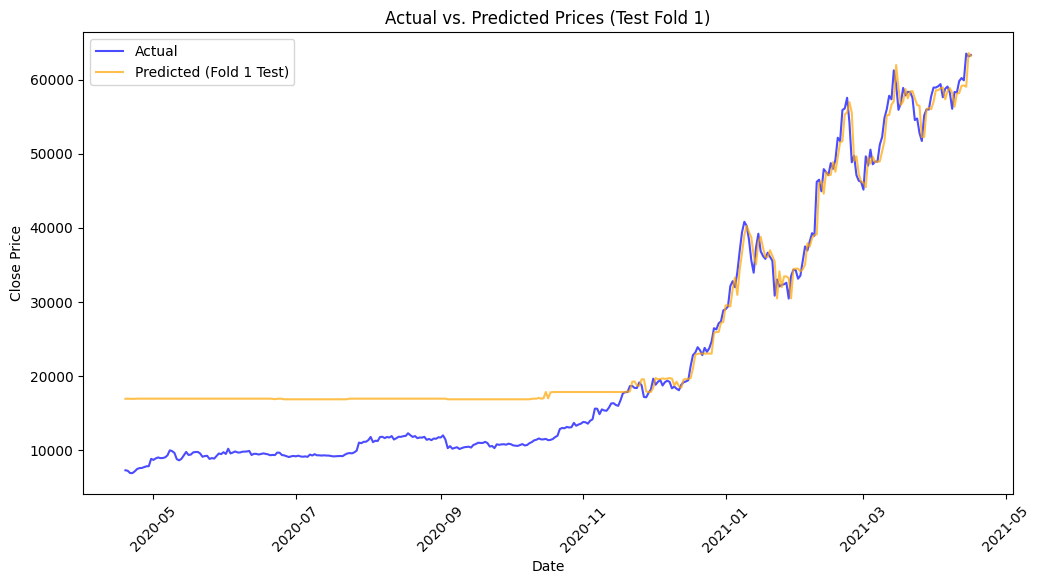

Fold 1 - R²: 0.9082870218173398, RMSE: 5205.555401049501, MAE: 4302.435495045609


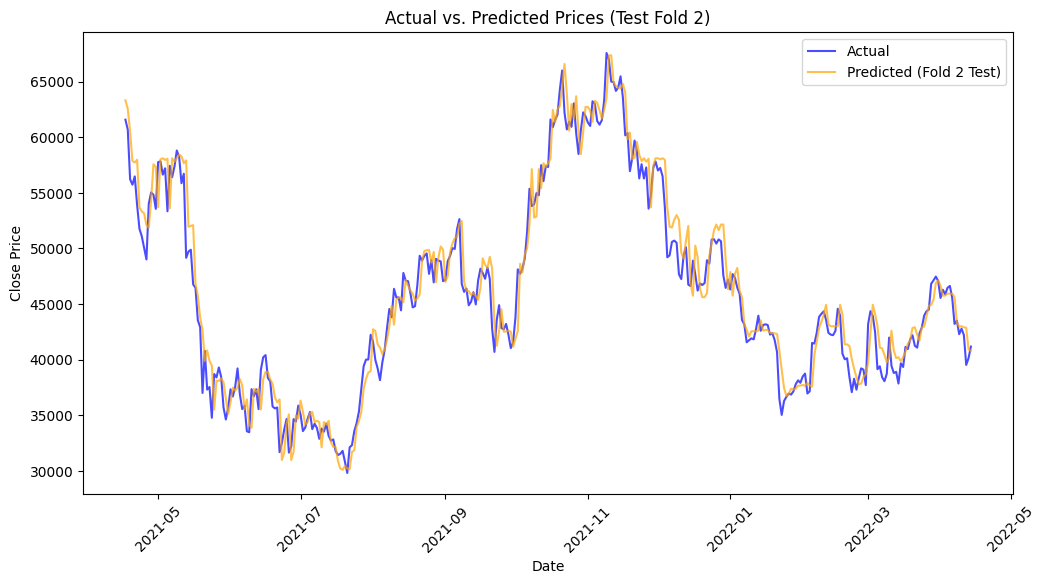

Fold 2 - R²: 0.9482190333035364, RMSE: 1981.2014298495185, MAE: 1493.0960392637467


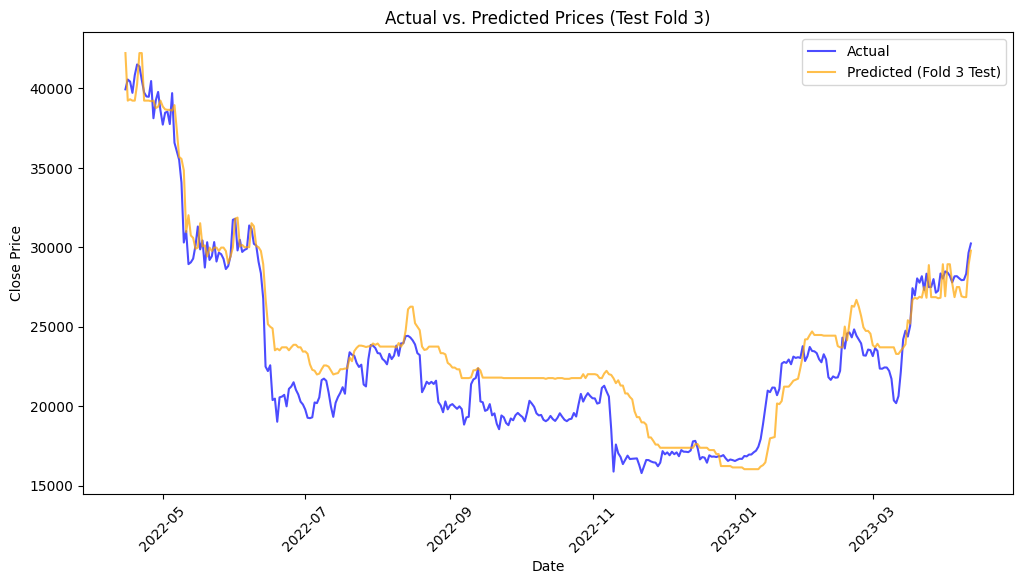

Fold 3 - R²: 0.8934942348454337, RMSE: 1907.5467586396298, MAE: 1559.3369780374658


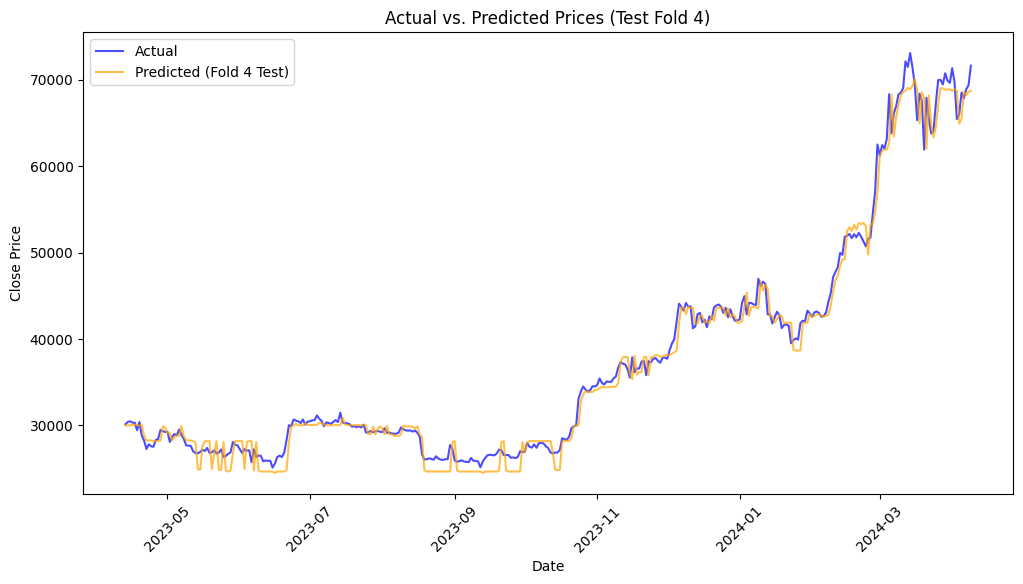

Fold 4 - R²: 0.9874821211429218, RMSE: 1455.0797251595748, MAE: 1084.175741147349


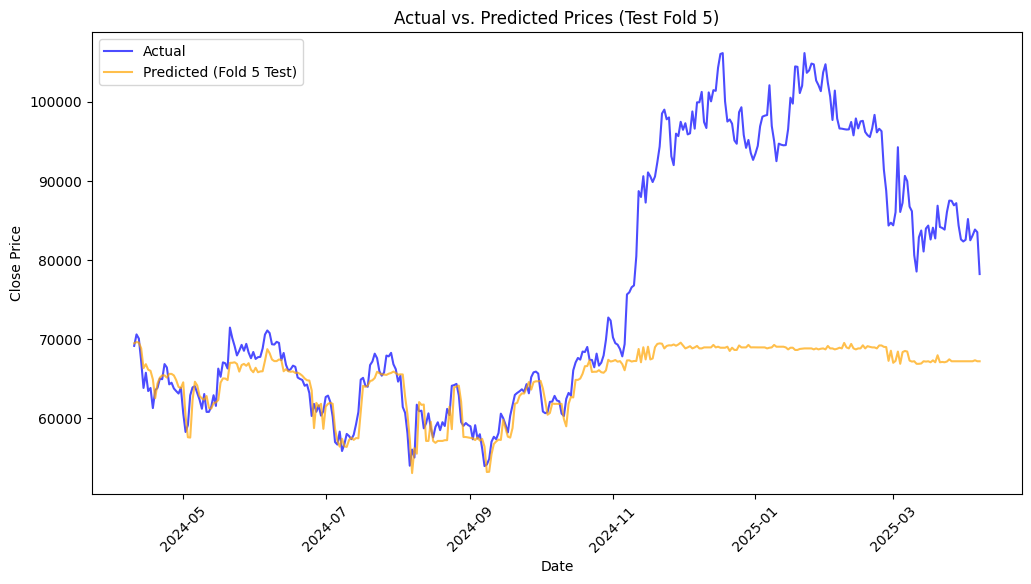

Fold 5 - R²: -0.13494206669361652, RMSE: 16818.719674837776, MAE: 11404.58865308448


In [ ]:
# Split the dataset into 5 roughly equal folds
fold_size = len(X) // 5
folds = [range(i * fold_size, (i + 1) * fold_size) for i in range(5)]

# Function for Time-Based Cross-Validation
def time_based_cv(folds, X, y):
    fold_results = []
    for i in range(5):
        # Define test and train indices
        test_idx = folds[i]
        train_idx = [j for k, fold in enumerate(folds) if k != i for j in fold]

        # Create train-test split
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Train Random Forest Model
        rf_model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
        rf_model.fit(X_train, y_train)

        # Predict on Test Data
        y_test_pred = rf_model.predict(X_test)

        # Evaluate Performance
        r2 = r2_score(y_test, y_test_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        mae = mean_absolute_error(y_test, y_test_pred)
        fold_results.append((r2, rmse, mae))

        # Plot Actual vs. Predicted for the Test Fold
        plt.figure(figsize=(12, 6))
        plt.plot(y_test.index, y_test.values, label="Actual", color="blue", alpha=0.7)
        plt.plot(y_test.index, y_test_pred, label=f"Predicted (Fold {i+1} Test)", color="orange", alpha=0.7)
        plt.title(f"Actual vs. Predicted Prices (Test Fold {i+1})")
        plt.xlabel("Date")
        plt.ylabel("Close Price")
        plt.legend()
        plt.xticks(rotation=45)
        plt.show()

        print(f"Fold {i+1} - R²: {r2}, RMSE: {rmse}, MAE: {mae}")

    return fold_results

# Run Time-Based Cross-Validation
results = time_based_cv(folds, X, y)


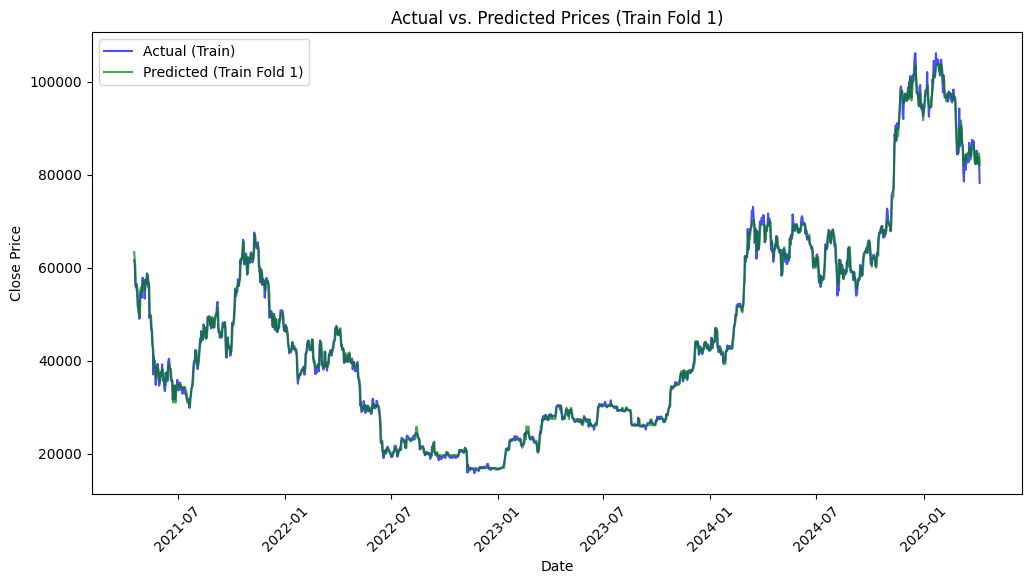

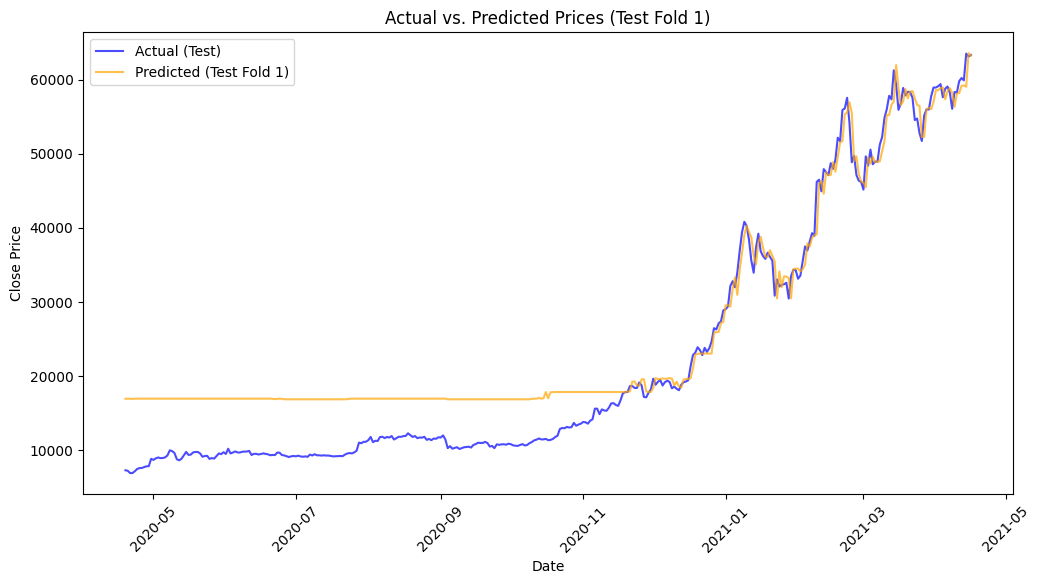

Fold 1 Results:
    Train - R²: 0.9968, RMSE: 1265.1371, MAE: 870.2647
    Test  - R²: 0.9083, RMSE: 5205.5554, MAE: 4302.4355


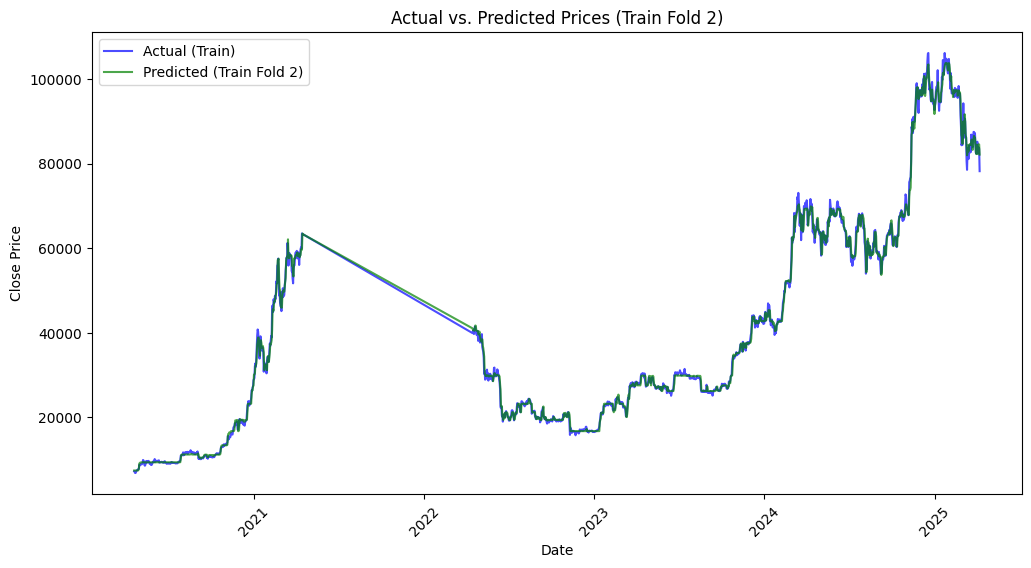

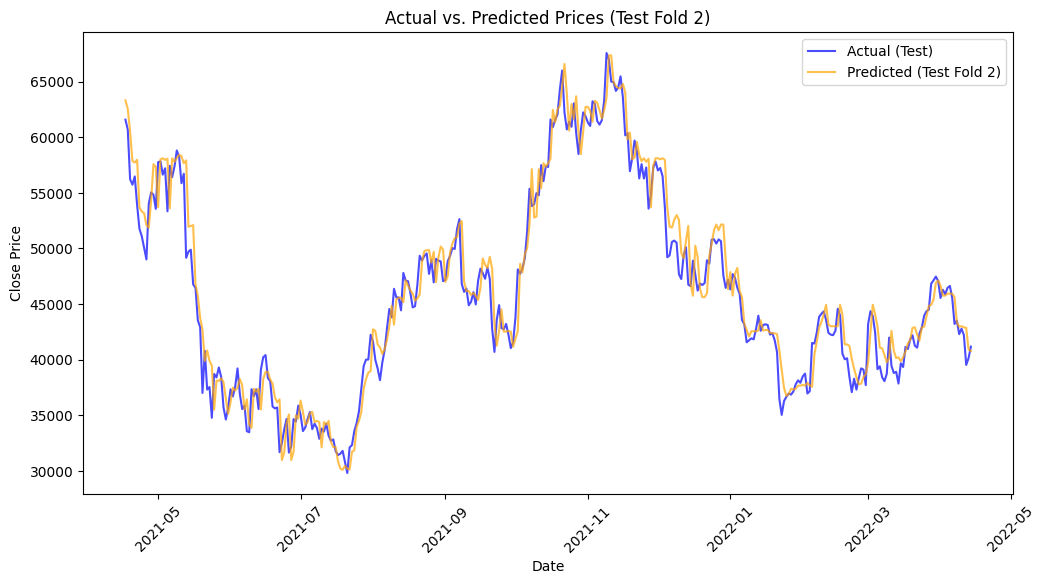

Fold 2 Results:
    Train - R²: 0.9981, RMSE: 1114.6722, MAE: 740.4635
    Test  - R²: 0.9482, RMSE: 1981.2014, MAE: 1493.0960


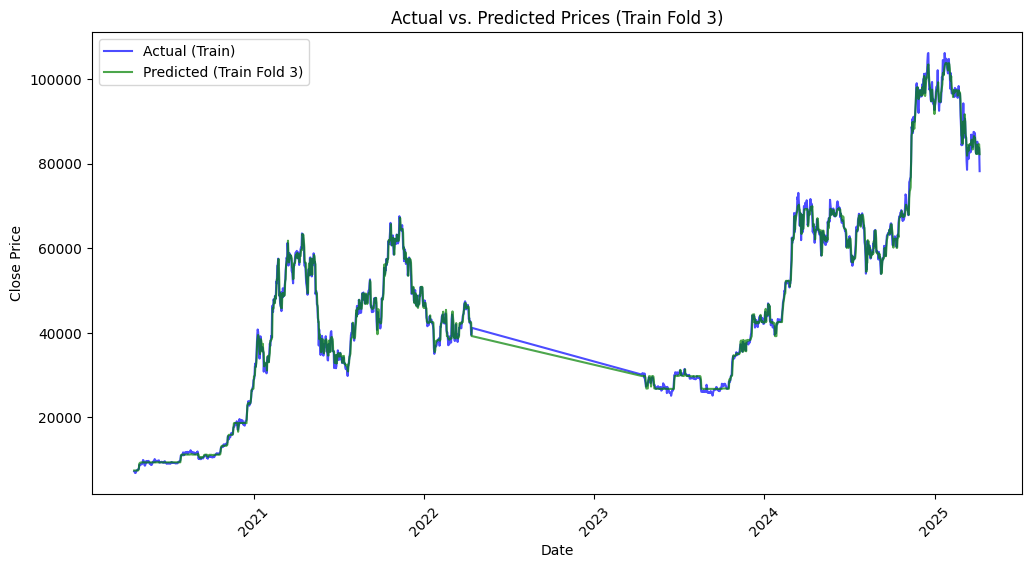

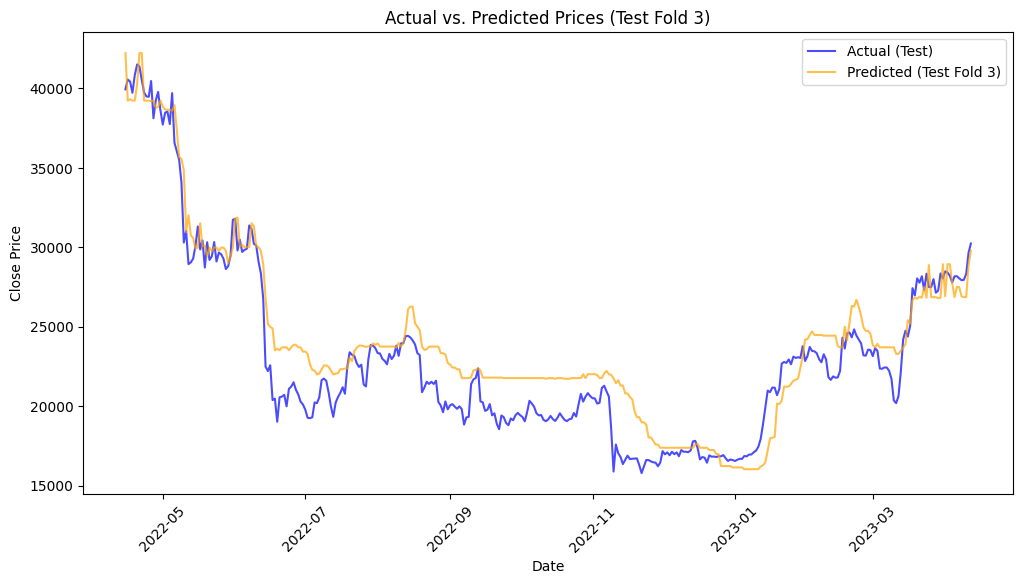

Fold 3 Results:
    Train - R²: 0.9968, RMSE: 1367.7480, MAE: 949.3383
    Test  - R²: 0.8935, RMSE: 1907.5468, MAE: 1559.3370


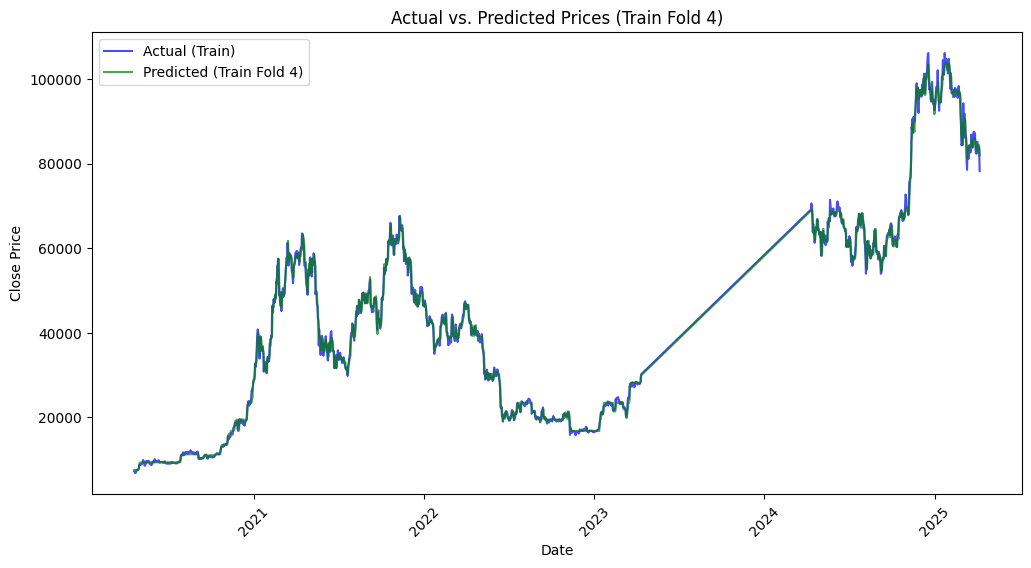

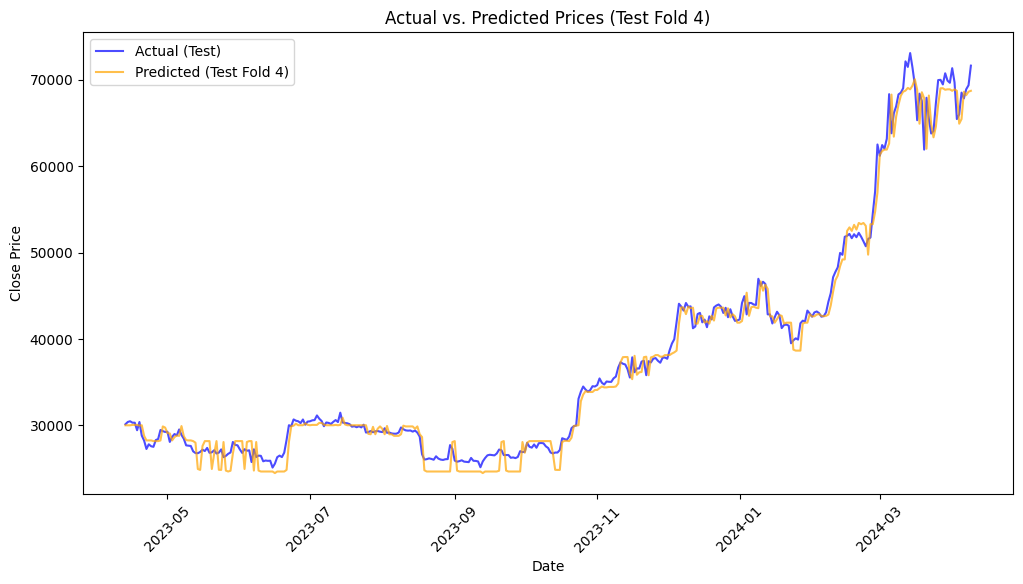

Fold 4 Results:
    Train - R²: 0.9975, RMSE: 1275.9066, MAE: 878.1864
    Test  - R²: 0.9875, RMSE: 1455.0797, MAE: 1084.1757


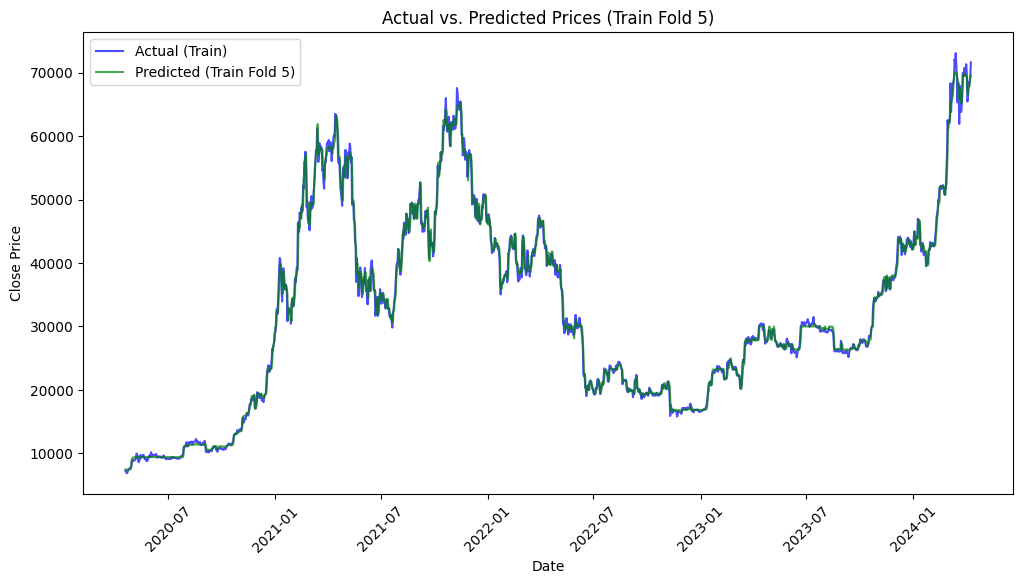

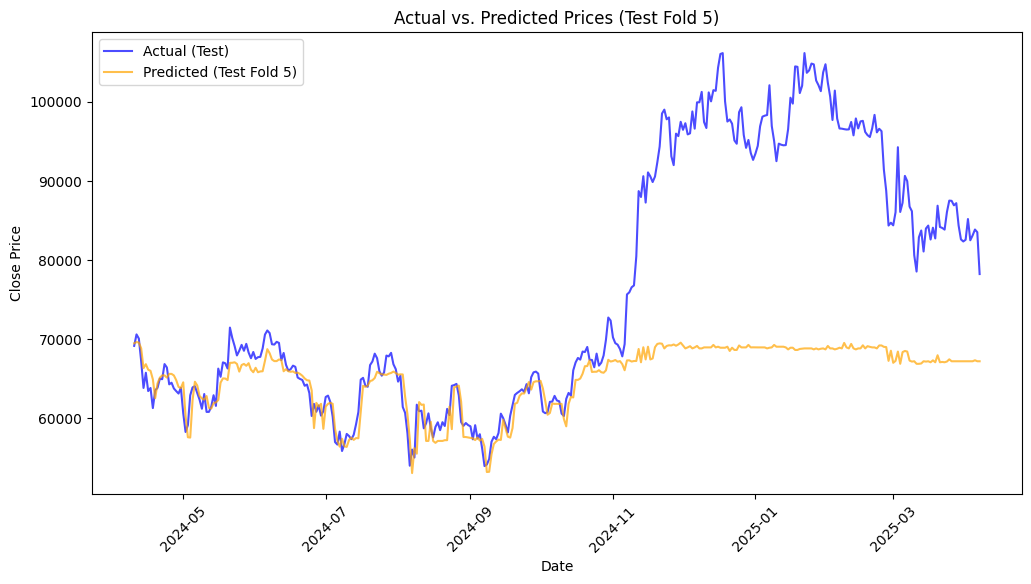

Fold 5 Results:
    Train - R²: 0.9952, RMSE: 1074.3683, MAE: 700.7394
    Test  - R²: -0.1349, RMSE: 16818.7197, MAE: 11404.5887


In [ ]:
# Split the dataset into 5 roughly equal folds
fold_size = len(X) // 5
folds = [range(i * fold_size, (i + 1) * fold_size) for i in range(5)]

# Function for Time-Based Cross-Validation
def time_based_cv(folds, X, y):
    fold_results = []
    for i in range(5):
        # Define test and train indices
        test_idx = folds[i]
        train_idx = [j for k, fold in enumerate(folds) if k != i for j in fold]

        # Create train-test split
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Train Random Forest Model
        rf_model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
        rf_model.fit(X_train, y_train)

        # Predict on Train and Test Data
        y_train_pred = rf_model.predict(X_train)
        y_test_pred = rf_model.predict(X_test)

        # Evaluate Performance
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        mae_train = mean_absolute_error(y_train, y_train_pred)
        mae_test = mean_absolute_error(y_test, y_test_pred)
        fold_results.append((r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test))

        # Plot Actual vs. Predicted for Train and Test Sets
        plt.figure(figsize=(12, 6))
        plt.plot(y_train.index, y_train.values, label="Actual (Train)", color="blue", alpha=0.7)
        plt.plot(y_train.index, y_train_pred, label=f"Predicted (Train Fold {i+1})", color="green", alpha=0.7)
        plt.title(f"Actual vs. Predicted Prices (Train Fold {i+1})")
        plt.xlabel("Date")
        plt.ylabel("Close Price")
        plt.legend()
        plt.xticks(rotation=45)
        plt.show()

        plt.figure(figsize=(12, 6))
        plt.plot(y_test.index, y_test.values, label="Actual (Test)", color="blue", alpha=0.7)
        plt.plot(y_test.index, y_test_pred, label=f"Predicted (Test Fold {i+1})", color="orange", alpha=0.7)
        plt.title(f"Actual vs. Predicted Prices (Test Fold {i+1})")
        plt.xlabel("Date")
        plt.ylabel("Close Price")
        plt.legend()
        plt.xticks(rotation=45)
        plt.show()

        # Print Performance Metrics
        print(f"Fold {i+1} Results:")
        print(f"    Train - R²: {r2_train:.4f}, RMSE: {rmse_train:.4f}, MAE: {mae_train:.4f}")
        print(f"    Test  - R²: {r2_test:.4f}, RMSE: {rmse_test:.4f}, MAE: {mae_test:.4f}")

    return fold_results

# Run Time-Based Cross-Validation
results = time_based_cv(folds, X, y)


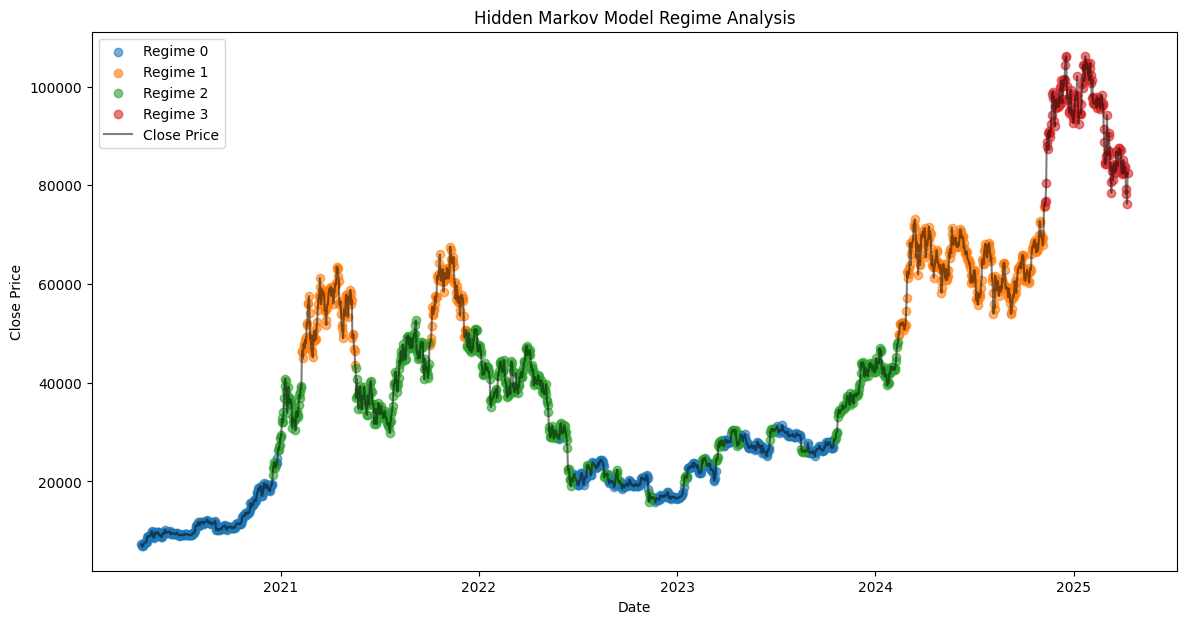

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt

# Load Dataset
df = pd.read_csv("your_dataset.csv")  # Replace with your dataset file name

# Ensure 'date' column exists and is properly formatted
df.rename(columns={'Date': 'date'}, inplace=True)  # Adjust column name if needed
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Convert to datetime
df.dropna(subset=['date'], inplace=True)  # Drop rows with missing dates
df.set_index('date', inplace=True)  # Set 'date' as the index

# Feature Engineering
df['rolling_volatility'] = df['Close'].rolling(window=7).std()  # Calculate rolling volatility
df['rolling_mean_7'] = df['Close'].rolling(window=7).mean()  # Calculate rolling mean

# Drop NaN rows caused by rolling operations
df.dropna(inplace=True)

# Define Features for HMM
hmm_features = ['Close', 'rolling_volatility']  # Features used for HMM training

# Train Hidden Markov Model
hmm_model = GaussianHMM(n_components=4, covariance_type="diag", n_iter=1000, random_state=42)
hmm_model.fit(df[hmm_features])  # Train the HMM using selected features

# Predict Regimes
regimes = hmm_model.predict(df[hmm_features])

# Add Predicted Regimes to DataFrame
df['regime'] = regimes

# Plot Regimes Over Time
plt.figure(figsize=(14, 7))
for regime in range(hmm_model.n_components):
    regime_data = df[df['regime'] == regime]
    plt.scatter(regime_data.index, regime_data['Close'], label=f"Regime {regime}", alpha=0.6)
plt.plot(df.index, df['Close'], color="black", alpha=0.5, label="Close Price")
plt.title("Hidden Markov Model Regime Analysis")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


LSTM

Training shape: (1414, 50, 1), Testing shape: (354, 50, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 0.0442 - val_loss: 0.0011
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 9.8144e-04 - val_loss: 0.0010
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 9.7127e-04 - val_loss: 0.0010
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 8.6234e-04 - val_loss: 9.4746e-04
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 9.1059e-04 - val_loss: 0.0011
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0010 - val_loss: 8.7808e-04
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 8.3121e-04 - val_loss: 8.1618e-04
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 8.4246e-04 - val_loss: 9.3018e-04
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 8.5864e-04 - val_loss: 8.6468e-04
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 7.8445e-04 - val_loss: 9.2121e-04
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 8.3130e-04 - val_loss: 8.5855e-04

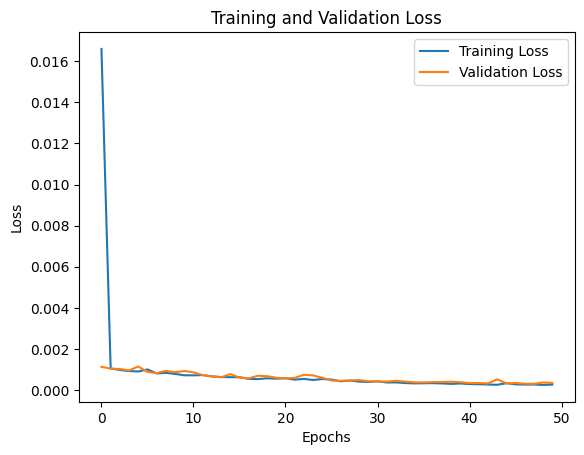

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


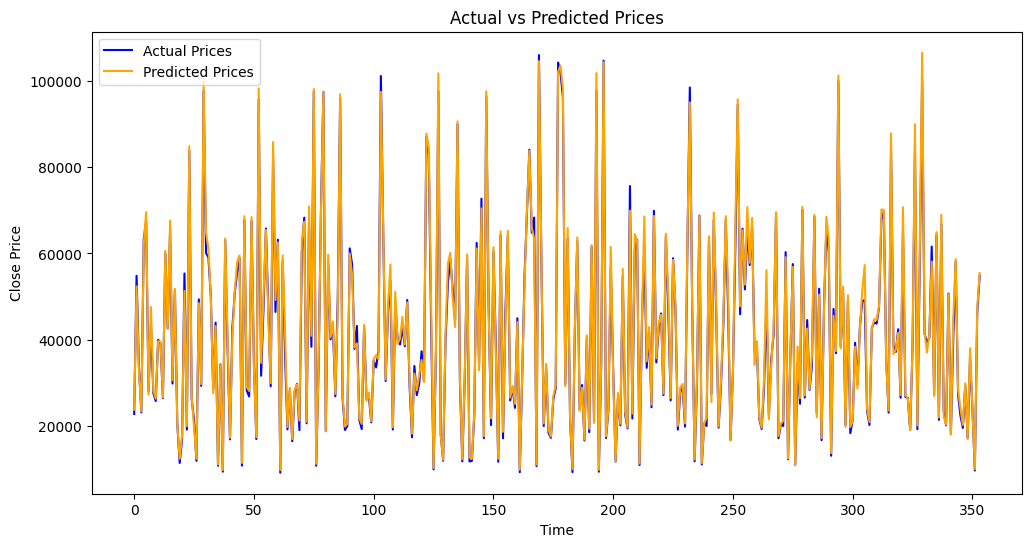

LSTM Model Training Complete.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load your dataset
# Replace with your dataset path or DataFrame (assumes 'df' already exists)
data = df[['Close']].values  # Use 'Close' column for price prediction

# STEP 1: Data Preparation
scaler = MinMaxScaler(feature_range=(0, 1))  # Normalize data between 0 and 1
scaled_data = scaler.fit_transform(data)

sequence_length = 50  # Number of timesteps for each input sequence

# Create sequences and corresponding targets
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(sequence_length, len(data)):
        sequences.append(data[i-sequence_length:i])
        targets.append(data[i])
    return np.array(sequences), np.array(targets)

X, y = create_sequences(scaled_data, sequence_length)

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training shape: {X_train.shape}, Testing shape: {X_test.shape}")

# STEP 2: Build the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))  # First LSTM layer
model.add(LSTM(units=50, return_sequences=False))  # Second LSTM layer
model.add(Dense(units=25))  # Dense layer for intermediate processing
model.add(Dense(units=1))  # Final output layer for prediction

model.compile(optimizer='adam', loss='mean_squared_error')  # Compile the model
model.summary()

# STEP 3: Train the Model
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), verbose=1)

# STEP 4: Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# STEP 5: Make Predictions
predicted = model.predict(X_test)

# Inverse scale the predictions to the original price range
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y_test)

# STEP 6: Plot Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', color='orange')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Final output
print("LSTM Model Training Complete.")


In [ ]:
# Modify the function to return data for each fold
def time_based_cv(folds, X, y):
    fold_results = []
    fold_data = {}  # Dictionary to store fold-specific data
    for i in range(5):
        # Define test and train indices
        test_idx = folds[i]
        train_idx = [j for k, fold in enumerate(folds) if k != i for j in fold]

        # Create train-test split
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Train Random Forest Model
        rf_model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
        rf_model.fit(X_train, y_train)

        # Predict on Train and Test Data
        y_train_pred = rf_model.predict(X_train)
        y_test_pred = rf_model.predict(X_test)

        # Evaluate Performance
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        mae_train = mean_absolute_error(y_train, y_train_pred)
        mae_test = mean_absolute_error(y_test, y_test_pred)
        fold_results.append((r2_train, r2_test, rmse_train, rmse_test, mae_train, mae_test))

        # Save data for the current fold
        fold_data[f"fold_{i+1}"] = {
            "train_indices": train_idx,
            "test_indices": test_idx,
            "y_train": y_train,
            "y_test": y_test,
            "y_train_pred": y_train_pred,
            "y_test_pred": y_test_pred
        }

    return fold_results, fold_data


In [ ]:
# Run the Time-Based Cross-Validation
results, fold_data = time_based_cv(folds, X, y)

# Extract data for fold 2 and fold 3
fold_2 = fold_data['fold_2']
fold_3 = fold_data['fold_3']

# Unpack Train and Test Data for Fold 2
y_train_2, y_test_2 = fold_2['y_train'], fold_2['y_test']
y_train_pred_2, y_test_pred_2 = fold_2['y_train_pred'], fold_2['y_test_pred']

# Unpack Train and Test Data for Fold 3
y_train_3, y_test_3 = fold_3['y_train'], fold_3['y_test']
y_train_pred_3, y_test_pred_3 = fold_3['y_train_pred'], fold_3['y_test_pred']


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Metrics for Fold 2
r2_train_2 = r2_score(y_train_2, y_train_pred_2)
r2_test_2 = r2_score(y_test_2, y_test_pred_2)
rmse_train_2 = np.sqrt(mean_squared_error(y_train_2, y_train_pred_2))
rmse_test_2 = np.sqrt(mean_squared_error(y_test_2, y_test_pred_2))
mae_train_2 = mean_absolute_error(y_train_2, y_train_pred_2)
mae_test_2 = mean_absolute_error(y_test_2, y_test_pred_2)

# Metrics for Fold 3
r2_train_3 = r2_score(y_train_3, y_train_pred_3)
r2_test_3 = r2_score(y_test_3, y_test_pred_3)
rmse_train_3 = np.sqrt(mean_squared_error(y_train_3, y_train_pred_3))
rmse_test_3 = np.sqrt(mean_squared_error(y_test_3, y_test_pred_3))
mae_train_3 = mean_absolute_error(y_train_3, y_train_pred_3)
mae_test_3 = mean_absolute_error(y_test_3, y_test_pred_3)

# Print Results for Fold 2
print(f"Fold 2 Metrics:")
print(f"    Train - R²: {r2_train_2:.4f}, RMSE: {rmse_train_2:.4f}, MAE: {mae_train_2:.4f}")
print(f"    Test  - R²: {r2_test_2:.4f}, RMSE: {rmse_test_2:.4f}, MAE: {mae_test_2:.4f}")

# Print Results for Fold 3
print(f"Fold 3 Metrics:")
print(f"    Train - R²: {r2_train_3:.4f}, RMSE: {rmse_train_3:.4f}, MAE: {mae_train_3:.4f}")
print(f"    Test  - R²: {r2_test_3:.4f}, RMSE: {rmse_test_3:.4f}, MAE: {mae_test_3:.4f}")


Fold 2 Metrics:
    Train - R²: 0.9981, RMSE: 1114.6722, MAE: 740.4635
    Test  - R²: 0.9482, RMSE: 1981.2014, MAE: 1493.0960
Fold 3 Metrics:
    Train - R²: 0.9968, RMSE: 1367.7480, MAE: 949.3383
    Test  - R²: 0.8935, RMSE: 1907.5468, MAE: 1559.3370


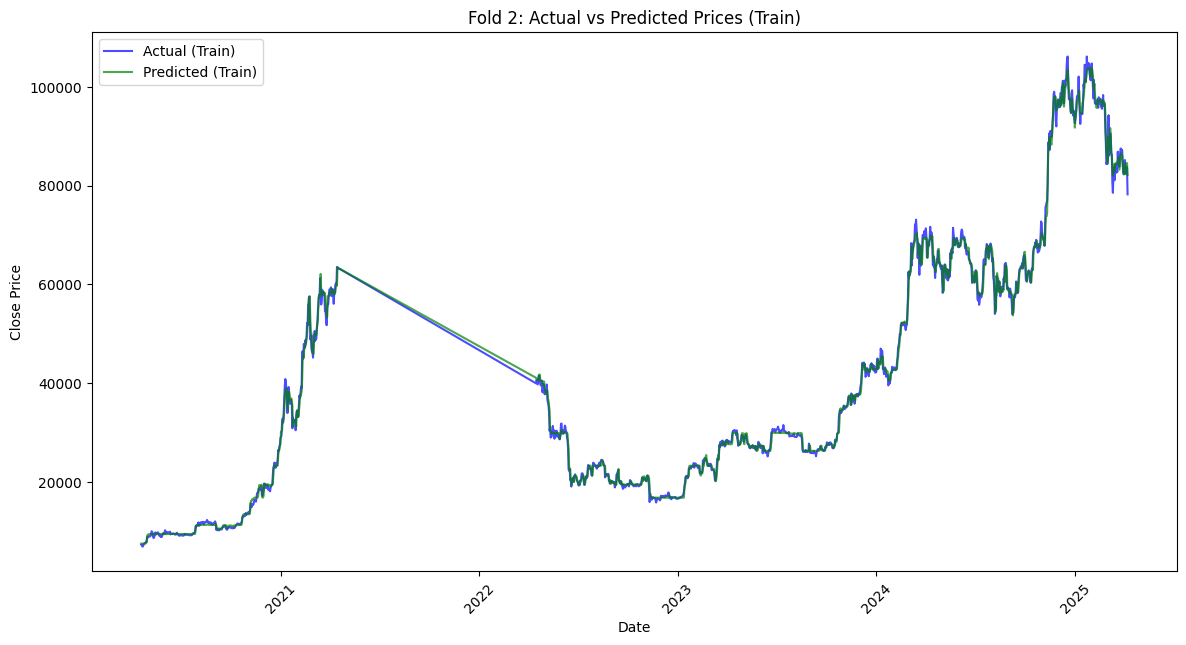

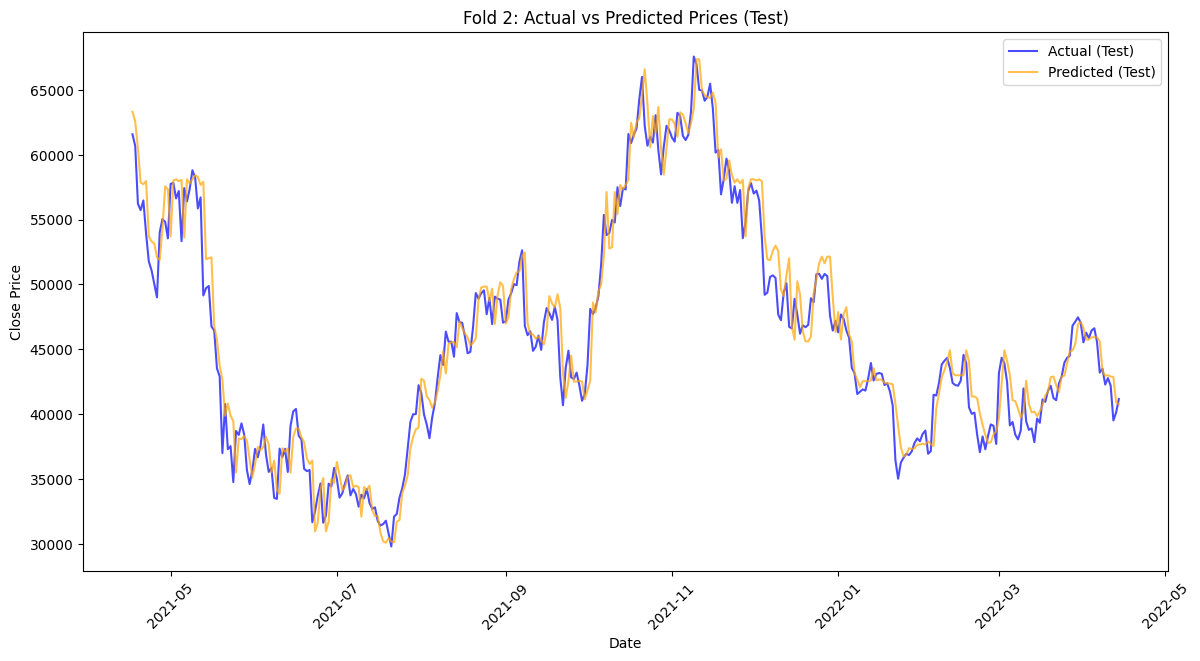

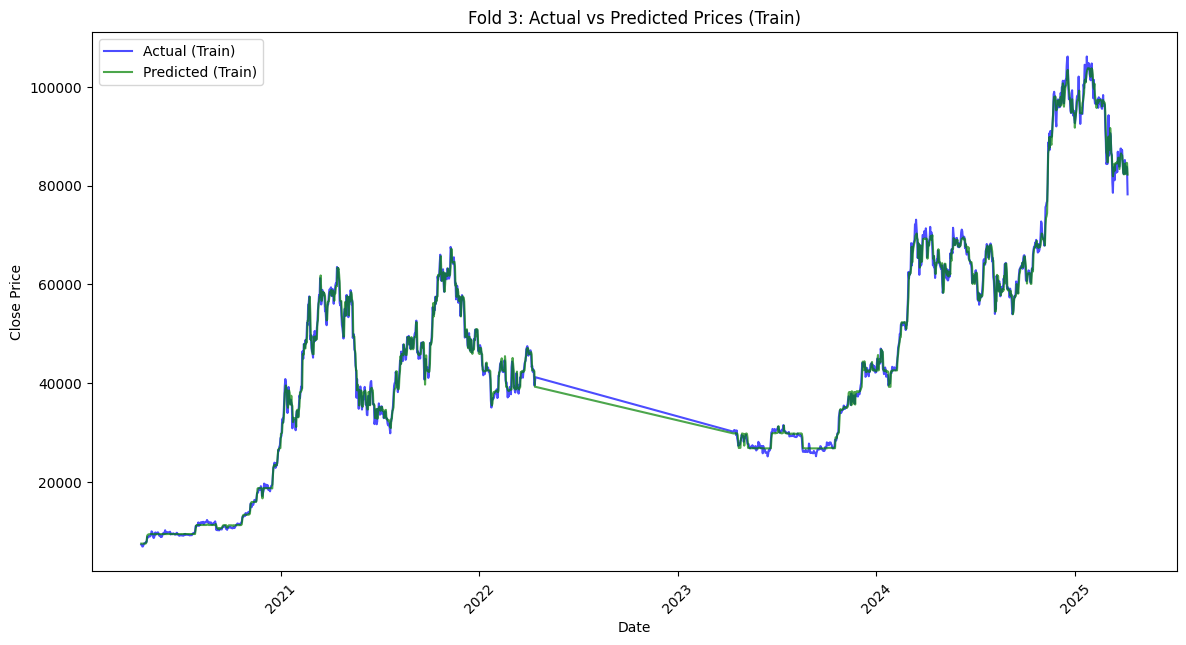

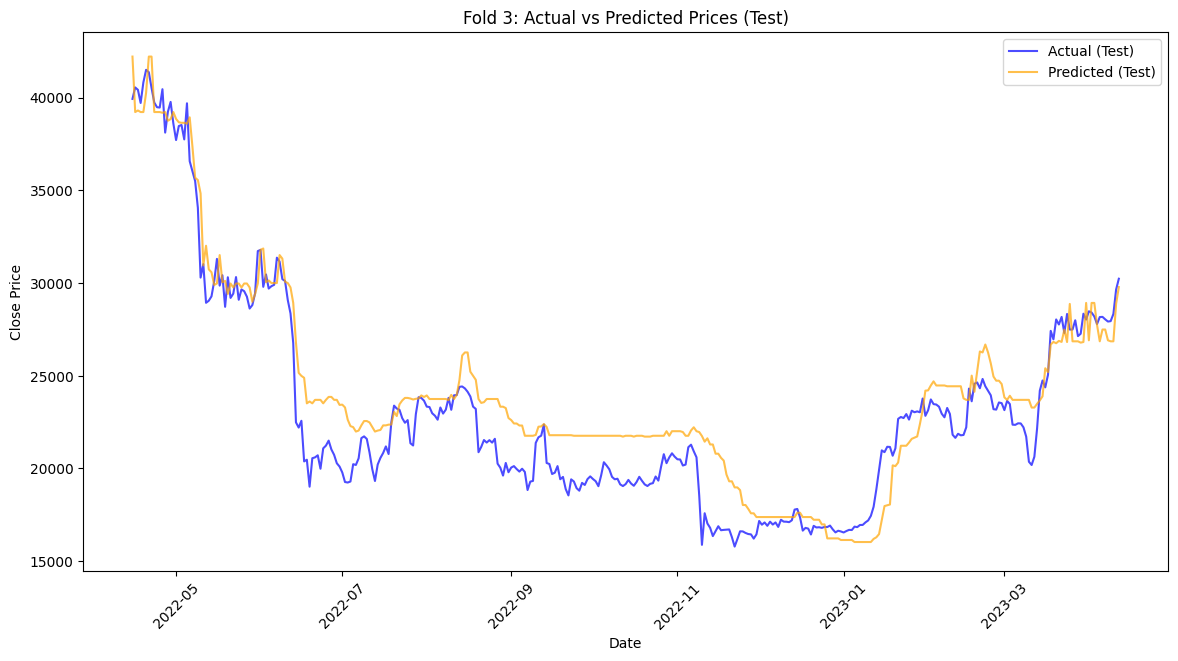

In [ ]:
import matplotlib.pyplot as plt

# Plot for Fold 2
plt.figure(figsize=(14, 7))
plt.plot(y_train_2.index, y_train_2.values, label="Actual (Train)", color="blue", alpha=0.7)
plt.plot(y_train_2.index, y_train_pred_2, label="Predicted (Train)", color="green", alpha=0.7)
plt.title("Fold 2: Actual vs Predicted Prices (Train)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(y_test_2.index, y_test_2.values, label="Actual (Test)", color="blue", alpha=0.7)
plt.plot(y_test_2.index, y_test_pred_2, label="Predicted (Test)", color="orange", alpha=0.7)
plt.title("Fold 2: Actual vs Predicted Prices (Test)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plot for Fold 3
plt.figure(figsize=(14, 7))
plt.plot(y_train_3.index, y_train_3.values, label="Actual (Train)", color="blue", alpha=0.7)
plt.plot(y_train_3.index, y_train_pred_3, label="Predicted (Train)", color="green", alpha=0.7)
plt.title("Fold 3: Actual vs Predicted Prices (Train)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(y_test_3.index, y_test_3.values, label="Actual (Test)", color="blue", alpha=0.7)
plt.plot(y_test_3.index, y_test_pred_3, label="Predicted (Test)", color="orange", alpha=0.7)
plt.title("Fold 3: Actual vs Predicted Prices (Test)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# STEP 1: Clean missing values
df['daily_return'] = df['daily_return'].fillna(0)
df['Signal'] = df['Signal'].fillna(0)

# === Optional Filtering: Avoid buying in overbought conditions ===
# You can keep this if your dataset has RSI
# if 'RSI' in df.columns:
#     df.loc[df['RSI'] > 70, 'Signal'] = 0  # Avoid overbought signals

# STEP 2: Calculate Strategy Return
df['strategy_return'] = df['Signal'] * df['daily_return']

# Risk Management: Limit daily strategy return to avoid big losses
df['strategy_return'] = df['strategy_return'].clip(lower=-0.05, upper=0.05)

# STEP 3: Sharpe Ratio
def calculate_sharpe_ratio(returns, risk_free_rate=0.0, periods_per_year=365):
    excess_returns = returns - risk_free_rate
    mean_excess_return = excess_returns.mean()
    std_excess_return = excess_returns.std()
    if std_excess_return == 0:
        return 0.0
    sharpe_ratio = (mean_excess_return / std_excess_return) * np.sqrt(periods_per_year)
    return sharpe_ratio

sharpe = calculate_sharpe_ratio(df['strategy_return'])
print(f"Sharpe Ratio: {sharpe:.4f}")

# STEP 4: Maximum Drawdown (MDD)
def calculate_max_drawdown(returns):
    equity_curve = (1 + returns).cumprod()
    peak = equity_curve.cummax()
    drawdown = (equity_curve - peak) / peak
    max_drawdown = drawdown.min()
    return max_drawdown

mdd = calculate_max_drawdown(df['strategy_return'])
print(f"Maximum Drawdown (MDD): {mdd:.2%}")

# STEP 5: Trade Frequency
def calculate_trade_frequency(signals):
    trades = (signals != 1).sum() #We want to count when -1, meaning when bearish, thats where we will buy
    total_rows = len(signals)
    trade_frequency = (trades / total_rows) * 100
    return trade_frequency

trade_freq = calculate_trade_frequency(df['Signal'])
print(f"Trade Frequency: {trade_freq:.2f}% of data rows")


Sharpe Ratio: 2.1894
Maximum Drawdown (MDD): -36.20%
Trade Frequency: 8.09% of data rows
